# NDES Seminar: Elements of Statistical Learning

## Chapter 3: Linear Methods for Regression

#### Summer semester 2019, March 20.

Collection of notebooks from Chapter 3: https://github.com/dgkim5360/the-elements-of-statistical-learning-notebooks/
- - - -



**Outline:**

- Linear Regression Models and Least Squares
- Subset Selection
- **Shrinkage Methods**
- Methods Using Derived Input Directions ~ Principal components
- (Multiple Outcome Shrinkage)
- More on the Lasso and Related Path Algorithms


# $\S$ 3.2. Linear Regression Models and Least Squares

### The linear model

We have
* an input vector $X^T = (X_1, X_2, \cdots, X_p)$ and
* a real-valued output $Y$ to predict.

The linear regression model has the form with unknown parameters $\beta_j$'s,

\begin{equation}
f(X) = \beta_0 + \sum_{j=1}^p X_j\beta_j.
\end{equation}

The linear model either assumes that the regression function $\text{E}(Y|X)$ **is linear**, or that the linear model is a reasonable approximation.

The variable $X_j$ can come from different sources:
* Quantitative inputs, and its transformations, e.g., log, squared-root, square,
* basis expansions, e.g., $X_2=X_1^2, X_3=X_1^3$, leading to a polynomial representation,
* numeric or "dummy" coding of the levels of qualitative inputs.  
  For example, if $G$ is a five-level factor input, we might create $X_j=I(G=j),$ for $j = 1,\cdots,5$.
* Interactions between variables, e.g., $X_3=X_1\cdot X_2$.

No matter the source of the $X_j$, **the model is linear in the parameters.**

### Least squares fit

Typically we have a set of training data
* $(x_1, y_1), \cdots, (x_N, y_N)$ from which to estimate the parameters $\beta$.
* Each $x_i = (x_{i1}, x_{i2}, \cdots, x_{ip})^T$ is a vector of feature measurements for the $i$th case.

The most popular estimation method is _least squares_, in which we pick coefficients $\beta=(\beta_0,\beta_1,\cdots,\beta_p)^T$ to minimize the residual sum of squares

\begin{align}
\text{RSS}(\beta) &= \sum_{i=1}^N\left(y_i - f(x_i)\right)^2 \\
&= \sum_{i=1}^N \left(y_i - \beta_0 - \sum_{j=1}^px_{ij}\beta_j\right)^2.
\end{align}

From a statistical point of view, this criterion is reasonable if the training observations $(x_i,y_i)$ represent independent random draws from their population. Even if the $x_i$’s were not drawn randomly, the criterion is still valid if the $y_i$’s are conditionally independent given the inputs $x_i$.

See FIGURE 3.1 in the textbook for illustration of the geometry of least-squares fitting in $\mathbb{R}^{p+1}$ space occupied by the pairs $(X,Y)$.

> Note that RSS makes no assumptions about the validity of the linear model; it simply finds the best linear fit to the data. Least squares fitting is intuitively satisfying no matter how the data arise; the criterion measures the average lack of fit.

### Solution of least squares

How do we minimize RSS?

Denote
* $\mathbf{X}$ the $N\times(p+1)$ matrix with each row an input vector (with a 1 in the first position),
* $\mathbf{y}$ the $N$-vector of outputs in the training set.

Then we can write RSS as

\begin{equation}
\text{RSS}(\beta) = \left(\mathbf{y}-\mathbf{X}\beta\right)^T\left(\mathbf{y}-\mathbf{X}\beta\right) = \|\mathbf{y}-\mathbf{X}\beta\|^2.
\end{equation}

This is a quadratic function in the $p+1$ parameters. Differentiating w.r.t. $\beta$ we obtain

\begin{align}
\frac{\partial\text{RSS}}{\partial\beta} &= -2\mathbf{X}^T\left(\mathbf{y}-\mathbf{X}\beta\right) \\
\frac{\partial^2\text{RSS}}{\partial\beta\partial\beta^T} &= 2\mathbf{X}^T\mathbf{X}
\end{align}

Assuming (for the moment) that $\mathbf{X}$ has full column rank, and hence $\mathbf{X}^T\mathbf{X}$ is positive definite (therefore it is guaranteed to the unique minimum exists), we set the first derivative to zero

\begin{equation}
\mathbf{X}^T(\mathbf{y}-\mathbf{X}\beta) = 0
\end{equation}

to obtain the unique solution

\begin{equation}
\hat\beta = \left(\mathbf{X}^T\mathbf{X}\right)^{-1}\mathbf{X}^T\mathbf{y}.
\end{equation}

The predicted values at an input vector $x_0$ are given by

\begin{equation}
\hat{f}(x_0) = (1:x_0)^T\hat\beta,
\end{equation}

and fitted values at the training samples are

\begin{equation}
\hat{y} = \mathbf{X}\hat\beta = \mathbf{X}\left(\mathbf{X}^T\mathbf{X}\right)^{-1}\mathbf{X}^T\mathbf{y} = \mathbf{H}\mathbf{y},
\end{equation}

where $\hat{y_i}=\hat{f}(x_i)$. The matrix

\begin{equation}
\mathbf{H} = \mathbf{X}\left(\mathbf{X}^T\mathbf{X}\right)^{-1}\mathbf{X}^T
\end{equation}

is sometimes called the "hat" matrix because it puts the hat on $\mathbf{y}$.

### Geometrical representation of the least squares estimate

FIGURE 3.2 shows a different geometrical representation of the least squares estimate, this time in $\mathbb{R}^N$.

We denote the column vector of $\mathbf{X}$ by $\mathbf{x}_0$, $\mathbf{x}_1$, $\cdots$, $\mathbf{x}_p$, with $\mathbf{x}_0 \equiv 1$. For much of what follows, this forst column is treated like any other.

These vectors span a subspace of $\mathbb{R}^N$, also referred to as the column space of $\mathbf{X}$ denoted by $\text{col}(\mathbf{X})$. We minimize RSS by choosing $\hat\beta$ so that the residual vector $\mathbf{y}-\hat{\mathbf{y}}$ is orthogonal to this subspace. This orthogonality is expressed in

\begin{equation}
\mathbf{X}^T(\mathbf{y}-\mathbf{X}\beta) = 0,
\end{equation}

and the resulting estimate $\hat{\mathbf{y}}$ is hence the _orthogonal projection_ of $\mathbf{y}$ onto this subspace. The hat matrix $\mathbf{H}$ computes the orthogonal projection, and hence it is also known as a projection matrix.

#### Rank deficiency
It might happen that the columns of $\mathbf{X}$ are **not linearly independent**, so that $\mathbf{X}$ is not of full rank. This would occur, for example, if two of the inputs were perfectly correlated, e.g., $\mathbf{x}_2=3\mathbf{x}_1$.

Then $\mathbf{X}^T\mathbf{X}$ is singular and the least squares coefficients $\hat\beta$ **are not uniquely defined**. However, the fitted values $\hat{\mathbf{y}}=\mathbf{X}\hat\beta$ are still the projection of $\mathbf{y}$ onto the $\text{col}(\mathbf{X})$; there are just more than one way to express that projection in terms of the column vectors of $\mathbf{X}$.

The non-full-rank case occurs most often when one or more qualitative inputs are coded in a redundant fashion.

There is usually a natural way to resolve the non-unique representation, by recording and/or dropping redundant columns in $\mathbf{X}$. Most regression software packages detect these redundancies and automatically implement some strategy for removing them.

Rank deficientcies can also occur in signal and image analysis, where the number of inputs $p$ can exceed the number of training cases $N$. In this case, the features are typically reduced by filtering or else the fitting is controlled by regularization ($\S$ 5.2.3 and Chapter 18).

### Sampling properties of $\hat\beta$

Up to now we have made minimal assumptions about the true distribution of the data. In order to pin down the sampling properties of $\hat\beta$, we now assume that
* the observations $y_i$ are uncorrelated and
* $y_i$ have constant variance $\sigma^2$,
* the $x_i$ are fixed (nonrandom).

The variance-covariance matrix of the least squares estmiates is

\begin{align}
\text{Var}(\hat\beta) &= \text{Var}\left(\left(\mathbf{X}^T\mathbf{X}\right)^{-1}\mathbf{X}^T\mathbf{y}\right) \\
&= \left(\mathbf{X}^T\mathbf{X}\right)^{-1}\mathbf{X}^T\text{Var}\left(\mathbf{y}\right)\mathbf{X}\left(\mathbf{X}^T\mathbf{X}\right)^{-1} \\
&= \left(\mathbf{X}^T\mathbf{X}\right)^{-1}\sigma^2.
\end{align}

Typically one estimates the variance $\sigma^2$ by

\begin{equation}
\hat{\sigma^2} = \frac{1}{N-p-1}\sum_{i=1}^N\left(y_i-\hat{y}_i\right)^2,
\end{equation}

where the denominator $N-p-1$ rather than $N$ makes $\hat{\sigma^2}$ an unbiased estimate of $\sigma^2$:

\begin{equation}
\text{E}(\hat{\sigma^2}) = \sigma^2.
\end{equation}

### Inference and hypothesis testing
To draw inferences about the parameters and the model, additional assumptions are needed. We now assume that
* the linear model $f(X) = \beta_0 + \sum_{j=1}^p \beta_j X_j$ is the correct model for the mean.
  i.e., the conditional expectation of $Y$ is linear in $X$;
* the deviations of $Y$ around its **expectation are additive and Gaussian.**

Hence

\begin{align}
Y &= \text{E}\left(Y|X_1,\cdots,X_p\right)+\epsilon \\
&= \beta_0 + \sum_{j=1}^p X_j\beta_j + \epsilon,
\end{align}

where $\epsilon\sim N(0,\sigma^2)$. Then it is easy to show that

\begin{align}
\hat\beta\sim N\left(\beta, \left(\mathbf{X}^T\mathbf{X}\right)^{-1}\sigma^2\right), \\
(N-p-1)\hat\sigma^2\sim\sigma^2\chi^2_{N-p-1}.
\end{align}

In addition $\hat\beta$ and $\hat\sigma^2$ are statistically independent.

We use these distributional properties to form tests of hypothesis and confidence intervals for the parameters $\beta_j$. To test the null hypothesis $\mu_0: \beta_j=0$, we form the standardized coefficient or _Z-score_

\begin{equation}
z_j = \frac{\hat\beta_j}{\hat\sigma\sqrt{v_j}},
\end{equation}

where $v_j = \left(\mathbf{X}^T\mathbf{X}\right)^{-1}_{jj}$.

Under the null hypothesis, $z_j\sim t_{N-p-1}$, and hence a large (absolute) value of $z_j$ will lead to rejection of this null hypothesis.

If $\hat\sigma$ is replaced by a known value $\sigma$, then $z_j$ would have a standard normal distribution. The difference between the tail quatiles of $t$-distribution and a standard normal distribution become negligible as the sample size increases, so we typically use the normal quantiles (see FIGURE 3.3).

In [1]:
"""FIGURE 3.3. The tail probabilities for three distributions, t30, t100, N(0,1).

Pr(|Z| > z) for three distributions, t(df=30), t(df=100), and standard normal.
The difference between t and the standard normal becomes negligible for N > 100.
"""
import matplotlib.pyplot as plt
import scipy
import scipy.stats

x = scipy.linspace(1.9, 3, 1000)
pdf_gaussian = scipy.stats.norm.pdf(x)
pdf_t30 = scipy.stats.t.pdf(x, df=30)
pdf_t100 = scipy.stats.t.pdf(x, df=100)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(x, pdf_gaussian, label='normal')
ax.plot(x, pdf_t30, label='t(df=30)')
ax.plot(x, pdf_t100, label='t(df=100)')
ax.legend()
ax.plot([1.9, 3], [.01, .01], '--', color='gray')
ax.plot([1.9, 3], [.05, .05], '--', color='gray')
ax.set_xlabel('Z')
ax.set_ylabel('Tail Probabilites')
plt.show()

<Figure size 640x480 with 1 Axes>

Often we need to test for the significance of groups of coefficients simultaneously. For example, to test if a categorical variable with $k$ levels can be excluded from a model, we need to test whether the coefficients of the dummy variables used to represent the levels can all be set to zero.

Here we use the $F$ statistics,

\begin{equation}
F = \frac{(\text{RSS}_0-\text{RSS}_1)/(p_1-p_0)}{\text{RSS}_1/(N-p_1-1)},
\end{equation}

where
* $\text{RSS}_1$ is for the bigger model with $p_1+1$ parameters and
* $\text{RSS}_0$ for the nested smaller model with $p_0+1$ parameters,
* having $p_1-p_0$ parameters constrained to be zero.

The $F$ statistic measures the change in residual sum-of-squares per additional parameter in the bigger model, and it is normalized by an estimate of $\sigma^2$.

Under the Gaussian assumption, and the null hypothesis that the smaller models is correct, the $F$ statistics will have a $F_{p_1-p_0,N-p_1-1}$ distribution. It can be shown (Exercose 3.1) that the $t$-statistic $z_j = \hat\beta_j \big/ (\hat\sigma \sqrt{v_j})$ are equivalent to the $F$ statistic for dropping the single coefficient $\beta_j$ from the model.

For large $N$, the quantiles of $F_{p_1-p_0,N-p_1-1}$ approaches those of $\chi^2_{p_1-p_0}/(p_1-p_0)$.

### Confidence intervals

Similarly, we can isolate $\beta_j$ in $\hat\beta \sim N(\beta, \left(\mathbf{X}^T \mathbf{X}\right)^{-1}\sigma^2)$ to obtain a $1-2\alpha$ confidence interval for $\beta_j$:

\begin{equation}
\left(\hat\beta_j-z^{1-\alpha}v_j^{\frac{1}{2}}\hat\sigma, \hat\beta_j+z^{1-\alpha}v_j^{\frac{1}{2}}\hat\sigma\right),
\end{equation}

where $z^{(1-\alpha)}$ is the $1-\alpha$ percentile of the normal distribution:

\begin{align}
z^{(1-0.025)} &= 1.96, \\
z^{(1-0.05)} &= 1.645, \text{etc}.
\end{align}

Hence the standard practice of reporting $\hat\beta \pm 2\cdot \text{se}(\hat\beta)$ amounts to an approximate 95% confidence interval.

Even if the Gaussian error assumption does not hold, this interval will be approximately corrent, with its coverage approaching $1-2\alpha$ as the sample size $N \rightarrow \infty$.

In a similar fashion we can obtain an approximate confidence set for the entire parameter vector $\beta$, namely

\begin{equation}
C_\beta = \left\{ \beta \big| (\hat\beta-\beta)^T\mathbf{X}^T\mathbf{X}(\hat\beta-\beta) \le \hat\sigma^2{\chi^2_{p+1}}^{(1-\alpha)}\right\},
\end{equation}

where ${\chi_l^2}^{(1-\alpha)}$ is the $1-\alpha$ percentile of the chi-squared distribution on $l$ degrees of freedom;

\begin{align}
{\chi_5^2}^{(1-0.05)} &= 11.1, \\
{\chi_5^2}^{(1-0.1)} &= 9.2.
\end{align}

This condifence set for $\beta$ generates a corresponding confidence set for the true function $f(x) = x^T\beta$, namely

\begin{equation}
\left\{ x^T\beta \big| \beta \in C_\beta \right\}
\end{equation}

(Exercise 3.2; FIGURE 5.4).

## $\S$ 3.2.1. Example: Prostate Cancer

The data for this example come from a study by Stamey et al. (1989). They examined the correlation between the level of prostate-specific antigen and a number of clinical measures in men who were about to receive a radical prostatectomy.

The variables are
* log cancer volumn ($\textsf{lcavol}$),
* log prostate weight ($\textsf{lweight}$),
* $\textsf{age}$,
* log of the amount of benign prostatic prostatic hyperplasia ($\textsf{lbph}$),
* seminal vesicle invasion ($\textsf{svi}$),
* log of capsular penetration ($\textsf{lcp}$),
* Gleason score ($\textsf{gleason}$), and
* percent of Gleason score 4 or 5 ($\textsf{pgg45}$).

In [2]:
%matplotlib inline
import math

import pandas as pd
import scipy
import scipy.stats
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('../data/prostate/prostate.data', delimiter='\t',
                   index_col=0)
data.head(7)

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train
1,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783,T
2,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519,T
3,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519,T
4,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519,T
5,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564,T
6,-1.049822,3.228826,50,-1.386294,0,-1.386294,6,0,0.765468,T
7,0.737164,3.473518,64,0.615186,0,-1.386294,6,0,0.765468,F


In [4]:
data.describe()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
count,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000
mean,1.350010,3.628943,63.865979,0.100356,0.216495,-0.179366,6.752577,24.381443,2.478387
std,1.178625,0.428411,7.445117,1.450807,0.413995,1.398250,0.722134,28.204035,1.154329
min,-1.347074,2.374906,41.000000,-1.386294,0.000000,-1.386294,6.000000,0.000000,-0.430783
25%,0.512824,3.375880,60.000000,-1.386294,0.000000,-1.386294,6.000000,0.000000,1.731656
50%,1.446919,3.623007,65.000000,0.300105,0.000000,-0.798508,7.000000,15.000000,2.591516
75%,2.127041,3.876396,68.000000,1.558145,0.000000,1.178655,7.000000,40.000000,3.056357
max,3.821004,4.780383,79.000000,2.326302,1.000000,2.904165,9.000000,100.000000,5.582932


The correlation matrix of the predictors given in TABLE 3.1 shows many strong correlations.

In [5]:
"""TABLE 3.1. Correlations of predictors in the prostate cancer data

It shows many string correlations. For example, that both `lcavol` and
`lcp` show a strong relationship with the response `lpsa`, and with each
other. We need to fit the effects jointly to untangle the relationships
between the predictors and the response."""
data.corr()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
lcavol,1.000000,0.280521,0.225000,0.027350,0.538845,0.675310,0.432417,0.433652,0.734460
lweight,0.280521,1.000000,0.347969,0.442264,0.155385,0.164537,0.056882,0.107354,0.433319
age,0.225000,0.347969,1.000000,0.350186,0.117658,0.127668,0.268892,0.276112,0.169593
lbph,0.027350,0.442264,0.350186,1.000000,-0.085843,-0.006999,0.077820,0.078460,0.179809
svi,0.538845,0.155385,0.117658,-0.085843,1.000000,0.673111,0.320412,0.457648,0.566218
lcp,0.675310,0.164537,0.127668,-0.006999,0.673111,1.000000,0.514830,0.631528,0.548813
gleason,0.432417,0.056882,0.268892,0.077820,0.320412,0.514830,1.000000,0.751905,0.368987
pgg45,0.433652,0.107354,0.276112,0.078460,0.457648,0.631528,0.751905,1.000000,0.422316
lpsa,0.734460,0.433319,0.169593,0.179809,0.566218,0.548813,0.368987,0.422316,1.000000


FIGURE 1.1 of Chapter 1 is a scatterplot matrix showing every pairwise plot between the variables.

We see that $\textsf{svi}$ is a binary variable, and $\textsf{gleason}$ is an ordered categorical variable.

We see, for example, that both $\textsf{lcavol}$ and $\textsf{lcp}$ show a strong relationship with the response $\textsf{lpsa}$, and with each other. We need to fit the effects jointly to untangle the relationships between the predictors and the response.

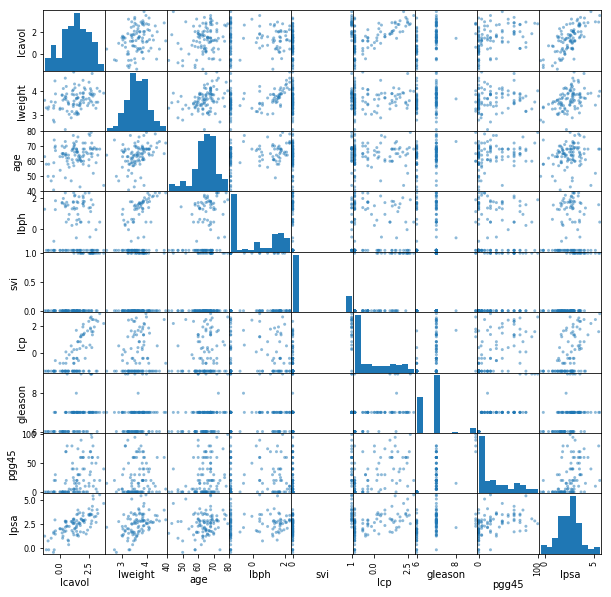

In [6]:
"""FIGURE 1.1. Scatterplot matrix of the prostate cancer data"""
pd.plotting.scatter_matrix(data, figsize=(10, 10))
plt.show()

We fit a linear model to $\textsf{lpsa}$, after first standardizing the predictors to have unit variance. We randomly split the dataset into a training set of size 67 and a test set of size 30. We applied least squares estimation to the training set, producing the estimates, standard errors and $Z$-scores shown in TABLE 3.2.

The $Z$-scores measure the effect of dropping that variable from the model. A $Z$-score greater than 2 in absolute value is approximately significant at the 5% level. For our example, we have 9 parameters, and the 0.025 tail quatiles of the $t_{67-9}$ distributions are $\pm 2.002$!

In [7]:
"""Table 3.2. Linear model fit to the prostate cancer data.

Roughly a Z score larger than two in absolute value is significant nonzero
at the p = 0.05 level.

We fit a linear model to the log of prostate-specific antigen, `lpsa`,
after first standardizing the predictors to have unit variance. We randomly
split the dataset into a training set of size 67 and a test set of size 30.
"""
data_y = data.pop('lpsa')
mask_train = data.pop('train')
data_x_normalized = data.apply(scipy.stats.zscore)
# data_normalized.describe()  # check it normalized!

data_x_train = data_x_normalized[mask_train == 'T']
data_y_train = data_y[mask_train == 'T']
data_x_test = data_x_normalized[mask_train == 'F']
data_y_test = data_y[mask_train == 'F']

size_train = sum(mask_train == 'T')
size_test = sum(mask_train == 'F')
size_predictor = len(data_x_train.columns)

mat_x = scipy.hstack((scipy.ones((size_train, 1)), data_x_train.as_matrix()))
vec_y = data_y_train.as_matrix()
mat_xt = scipy.transpose(mat_x)
mat_xx_inv = scipy.linalg.inv(mat_x.T @ mat_x)

ols_beta = mat_xx_inv @ mat_x.T @ vec_y
vec_y_fitted = mat_x @ ols_beta
est_sigma2 = sum((vec_y-vec_y_fitted)**2)/(size_train-size_predictor-1)

table_term = ['Intercept'] + list(data_x_train.columns)
table_coeff = ols_beta
table_stderr = [math.sqrt(mat_xx_inv[j, j]*est_sigma2)
                for j in range(size_predictor+1)]

print('{0:>15} {1:>15} {2:>15} {3:>15}'.format('Term', 'Coefficient',
                                               'Std. Error', 'Z Score'))
print('-'*64)
for term, coeff, stderr in zip(table_term, table_coeff, table_stderr):
    print('{0:>15} {1:>15f} {2:>15f} {3:>15f}'.format(term, coeff,
                                                      stderr, coeff/stderr))

           Term     Coefficient      Std. Error         Z Score
----------------------------------------------------------------
      Intercept        2.464933        0.089315       27.598203
         lcavol        0.676016        0.125975        5.366290
        lweight        0.261694        0.095134        2.750789
            age       -0.140734        0.100819       -1.395909
           lbph        0.209061        0.101691        2.055846
            svi        0.303623        0.122962        2.469255
            lcp       -0.287002        0.153731       -1.866913
        gleason       -0.021195        0.144497       -0.146681
          pgg45        0.265576        0.152820        1.737840


/usr/local/Cellar/ipython/7.2.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:24: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/usr/local/Cellar/ipython/7.2.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:25: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


The predictor $\textsf{lcavol}$ shows the strongest effect, with $\textsf{lweight}$ and $\textsf{svi}$ also strong.

Notice that $\textsf{lcp}$ is not significant, once $\textsf{lcavol}$ is in the model (when used in a model without $\textsf{lcavol}$, $\textsf{lcp}$ is strongly significant).

We can also test for the exclusion of a number of terms at once, using the $F$-statistic. For example, we consider dropping all the non-significant terms in TABLE 3.2, namely $\textsf{age}$, $\textsf{gleason}$, and $\textsf{pgg45}$. We get

\begin{equation}
\frac{(32-81 - 29.43)/(9-5)}{29.43/(67-9)} = 1.67,
\end{equation}

which has a $p$-value of

\begin{equation}
\text{Pr}(F_{4,58} \gt 1.67) = 0.17,
\end{equation}

and hence is not significant. NOTE: Null-hypothesis is that $\beta_{age} = \beta_{gleason} = \beta_{pgg45} = 0$, and it is not rejected.

In [8]:
"""F test for the exclusion of a number of terms at once

For example, we cansider dropping all the non-significant terms, namely
age, lcp, gleason, and pgg45."""
print("Null hypothesis: beta[3]=beta[6]=beta[7]=beta[8]=0")
data_x_train_alt = data_x_train.drop(['age', 'lcp', 'gleason', 'pgg45'],
                                     axis=1)

size_predictor_alt = len(data_x_train_alt.columns)

mat_x_alt = scipy.hstack((scipy.ones((size_train, 1)),
                          data_x_train_alt.as_matrix()))
ols_beta_alt = scipy.linalg.solve(mat_x_alt.T @ mat_x_alt,
                                  mat_x_alt.T @ vec_y)

vec_y_fitted_alt = mat_x_alt @ ols_beta_alt

rss0 = sum((vec_y-vec_y_fitted_alt)**2)
rss1 = sum((vec_y-vec_y_fitted)**2)
F_stat = (rss0-rss1)/(size_predictor-size_predictor_alt)*(size_train-size_predictor-1)/rss1
print('F = {}'.format(F_stat))
print('Pr(F({dfn},{dfd}) > {fstat:>.2f}) = {prob:.2f}'.format(
    dfn=size_predictor-size_predictor_alt,
    dfd=size_train-size_predictor-1,
    fstat=F_stat,
    prob=1-scipy.stats.f.cdf(F_stat,
                             dfn=size_predictor-size_predictor_alt,
                             dfd=size_train-size_predictor-1),
))

Null hypothesis: beta[3]=beta[6]=beta[7]=beta[8]=0
F = 1.6697548846375179
Pr(F(4,58) > 1.67) = 0.17


/usr/local/Cellar/ipython/7.2.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':


The mean prediction error on the test data is 0.521. In contrast, prediction using the mean training value of $\textsf{lpsa}$ has a test error of 1.057, which is called the "base error rate".

In [9]:
"""Prediction error on the test data

We can see that the linear model reduces the base error rate by about 50%
"""

mean_y_train = sum(vec_y)/size_train

mat_x_test = scipy.hstack((scipy.ones((size_test, 1)),
                           data_x_test.as_matrix()))
vec_y_test = data_y_test.as_matrix()
vec_y_test_fitted = mat_x_test @ ols_beta

err_base = sum((vec_y_test-mean_y_train)**2)/size_test
err_ols = sum((vec_y_test-vec_y_test_fitted)**2)/size_test

print('Base error rate = {}'.format(err_base))
print('OLS error rate = {}'.format(err_ols))

Base error rate = 1.0567332280603818
OLS error rate = 0.5212740055075996


/usr/local/Cellar/ipython/7.2.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':
/usr/local/Cellar/ipython/7.2.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.


Hence the linear model reduces the base error rate by about 50%.

We will return to this example later to compare various selection and shrinkage methods.

## $\S$ 3.2.2. The Gauss-Markov Theorem (-> BLUE)

One of the most famous results in statistics asserts that

> the least squares estimates of the parameter $\beta$ have the smallest variance among all linear unbiased estimates.

We will make this precise here, and also make clear that

> the restriction to unbiased estimates is not necessarily a wise one.

This observation will lead us to consider biased estimates such as ridge regression later in the chapter.

### The statement of the theorem

We focus on estimation of any linear combination of the parameters $\theta=a^T\beta$. The least squares estimate of $a^T\beta$ is

\begin{equation}
\hat\theta = a^T\hat\beta = a^T\left(\mathbf{X}^T\mathbf{X}\right)^{-1}\mathbf{X}^T\mathbf{y}.
\end{equation}

Considering $\mathbf{X}$ to be fixed and the linear model is correct, $a^T\beta$ is unbiased since

\begin{align}
\text{E}(a^T\hat\beta) &= \text{E}\left(a^T(\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}\right) \\
&= a^T(\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{X}\beta \\
&= a^T\beta
\end{align}

The Gauss-Markov Theorem states that if we have any other linear estimator $\tilde\theta = \mathbf{c}^T\mathbf{y}$ that is unbiased for $a^T\beta$, that is, $\text{E}(\mathbf{c}^T\mathbf{y})=a^T\beta$, then

\begin{equation}
\text{Var}(a^T\hat\beta) \le \text{Var}(\mathbf{c}^T\mathbf{y}).
\end{equation}

The proof (Exercise 3.3) uses the triangle inequality.

For simplicity we have stated the result in terms of estimation of a single parameter $a^T \beta$, but with a few more definitions one can state it in terms of the entire parameter vector $\beta$ (Exercise 3.3).

### Implications of the Gauss-Markov theorem

Consider the mean squared error of an estimator $\tilde\theta$ of $\theta$:

\begin{align}
\text{MSE}(\tilde\theta) &= \text{E}\left(\tilde\theta-\theta\right)^2 \\
&= \text{Var}\left(\tilde\theta\right) + \left[\text{E}\left(\tilde\theta-\theta\right)\right]^2 \\
&= \text{Var} + \text{Bias}^2
\end{align}

The Gauss-Markov theorem implies that the least squares estimator has the smallest MSE of all linear estimators with no bias. However there may well exist a biased estimator with smaller MSE. Such an estimator would trade a little bias for a larger reduction in variance.

Biased estimates are commonly used. Any method that shrinks or sets to zero some of the least squares coefficients may result in a biased estimate. We discuss many examples, including variable subset selection and ridge regression, later in this chapter.

From a more pragmatic point of view, most models are distortions of the truth, and hence are biased; picking the right model amounts to creating the right balance between bias and variance. We go into these issues in more detail in Chapter 7.

### Relation between prediction accuracy and MSE

MSE is intimately related to prediction accuracy, as discussed in Chapter 2.

Consider the prediction of the new response at input $x_0$,

\begin{equation}
Y_0 = f(x_0) + \epsilon.
\end{equation}

Then the expected prediction error of an estimate $\tilde{f}(x_0)=x_0^T\tilde\beta$ is

\begin{align}
\text{E}(Y_0 - \tilde{f}(x_0))^2 &= \text{E}\left(Y_0 -f(x_0)+f(x_0) - \tilde{f}(x_0)\right)^2\\
&= \sigma^2 + \text{E}\left(x_o^T\tilde\beta - f(x_0)\right)^2 \\
&= \sigma^2 + \text{MSE}\left(\tilde{f}(x_0)\right).
\end{align}

Therefore, expected prediction error and MSE differ only by the constant $\sigma^2$, representing the variance of the new observation $y_0$.

## $\S$ 3.2.3. Multiple Regression from Simple Univariate Regression

The linear model with $p \gt 1$ inputs is called _multiple linear regression model_.

The least squares estimates

\begin{equation}
\hat\beta = \left(\mathbf{X}^T \mathbf{X}\right)^{-1} \mathbf{X}^T \mathbf{y}
\end{equation}

for this model are best understood in terms of the estimates for the *univariate* ($p=1$) linear model, as we indicate in this section.

Suppose a univariate model with no intercept, i.e.,

\begin{equation}
Y=X\beta+\epsilon.
\end{equation}

The least squares estimate and residuals are

\begin{align}
\hat\beta &= \frac{\sum_1^N x_i y_i}{\sum_1^N x_i^2} = \frac{\langle\mathbf{x},\mathbf{y}\rangle}{\langle\mathbf{x},\mathbf{x}\rangle}, \\
r_i &= y_i - x_i\hat\beta, \\
\mathbf{r} &= \mathbf{y} - \mathbf{x}\hat\beta,
\end{align}

where
* $\mathbf{y}=(y_1,\cdots,y_N)^T$,
* $\mathbf{x}=(x_1,\cdots,x_N)^T$ and
* $\langle\cdot,\cdot\rangle$ denotes the dot product notation.

As we will see,

> this simple univariate regression provides the building block for multiple linear regression.

### Building blocks for multiple linear regression

Suppose next that the columns of the data matrix $\mathbf{X} = \left[\mathbf{x}_1,\cdots,\mathbf{x}_p\right]$ are orthogonal, i.e., 

\begin{equation}
\langle \mathbf{x}_j,\mathbf{x}_k\rangle = 0\text{ for all }j\neq k.
\end{equation}

Then it is easy to check that the multiple least squares estimates are equal to the univariate estimates:

\begin{equation}
\hat\beta_j = \frac{\langle\mathbf{x}_j,\mathbf{y}\rangle}{\langle\mathbf{x}_j,\mathbf{x}_j\rangle}, \forall j
\end{equation}

> In other words, when the inputs are orthogonal, they have no effect on each other's parameter estimates in the model.

Orthogonal inputs occur most often with balanced, designed experiments (where orthogonality is enforced), but almost never with observational data. Hence we will have to orthogonalize them in order to carry this idea further.

#### Orthogonalization
Suppose next that we have an intercept and a single input $\mathbf{x}$. Then the least squares coefficient of $\mathbf{x}$ has the form

\begin{equation}
\hat\beta_1 = \frac{\langle\mathbf{x}-\bar{x}\mathbf{1},\mathbf{y}\rangle}{\langle\mathbf{x}-\bar{x}\mathbf{1},\mathbf{x}-\bar{x}\mathbf{1}\rangle},
\end{equation}

where $\bar{x} = \sum x_i /N$ and $\mathbf{1} = \mathbf{x}_0$. And also note that

\begin{equation}
\bar{x}\mathbf{1} = \frac{\langle\mathbf{1},\mathbf{x}\rangle}{\langle\mathbf{1},\mathbf{1}\rangle}\mathbf{1},
\end{equation}

which means the fitted value in the case we regress $\mathbf{x}$ on $\mathbf{x}_0=\mathbf{1}$. Therefore we can view $\hat\beta_1$ as the result of two application of the simple regression with the following steps:
1. Regress $\mathbf{x}$ on $\mathbf{1}$ to produce the residual $\mathbf{z}=\mathbf{x}-\bar{x}\mathbf{1}$;
2. regress $\mathbf{y}$ on the residual $\mathbf{z}$ to give the coefficient $\hat\beta_1$.

> In this procedure, "regreess $\mathbf{b}$ on $\mathbf{a}$" means a simple univariate regression of $\mathbf{b}$ on $\mathbf{a}$ with no intercept, producing coefficient $\hat\gamma=\langle\mathbf{a},\mathbf{b}\rangle/\langle\mathbf{a},\mathbf{a}\rangle$ and residual vector $\mathbf{b}-\hat\gamma\mathbf{a}$. We say that $\mathbf{b}$ is adjusted for $\mathbf{a}$, or is "orthogonalized" w.r.t. $\mathbf{a}$.

In other words,
1. orthogonalize $\mathbf{x}$ w.r.t. $\mathbf{x}_0=\mathbf{1}$;
2. just a simple univariate regression, using the orthogonal predictors $\mathbf{1}$ and $\mathbf{z}$.

FIGURE 3.4 shows this process for two general inputs $\mathbf{x}_1$ and $\mathbf{x}_2$. The orthogonalization does not change the subspace spanned by $\mathbf{x}_0$ and $\mathbf{x}_1$, it simply produces an orthogonal basis for representing it.

This recipe gerenalizes to the case of $p$ inputs, as shown in ALGORITHM 3.1.

#### ALGORITHM 3.1. Regression by successive orthogonalization
1. Initialize $\mathbf{z}_0=\mathbf{x}_0=\mathbf{1}$.
2. For $j = 1, 2, \cdots, p$,  
  regress $\mathbf{x}_j$ on $\mathbf{z}_0,\mathbf{z}_1,\cdots,\mathbf{z}_{j-1}$ to produce
  * coefficients $\hat\gamma_{lj} = \langle\mathbf{z}_l,\mathbf{x}_j\rangle/\langle\mathbf{z}_l,\mathbf{z}_l\rangle$, for $l=0,\cdots, j-1$ and
  * residual vector $\mathbf{z}_j=\mathbf{x}_j - \sum_{k=0}^{j-1}\hat\gamma_{kj}\mathbf{z}_k$.
3. Regress $\mathbf{y}$ on the residual $\mathbf{z}_p$ to give the estimate $\hat\beta_p$,

  \begin{equation}
  \hat\beta_p = \frac{\langle\mathbf{z}_p,\mathbf{y}\rangle}{\langle\mathbf{z}_p,\mathbf{z}_p\rangle}.
  \end{equation}

Note that the inputs $\mathbf{z}_0,\cdots,\mathbf{z}_{j-1}$ in step 2 are orthogonal, hence the simple regression coefficients computed there are in fact also the multiple regression coefficients.

The result of this algorithm is

\begin{equation}
\hat\beta_p = \frac{\langle \mathbf{z}_p, \mathbf{y} \rangle}{\langle \mathbf{z}_p, \mathbf{z}_p \rangle}.
\end{equation}

Re-arranging the residual in step 2, we can see that each of the $\mathbf{x}_j$ is

\begin{equation}
\mathbf{x}_j = \mathbf{z}_j + \sum_{k=0}^{j-1} \hat\gamma_{kj}\mathbf{z}_k,
\end{equation}

which is a linear combination of the $\mathbf{z}_k$, $k \le j$. Since the $\mathbf{z}_j$ are all orthogonal, they form a basis for the $\text{col}(\mathbf{X})$, and hence the least squares projection onto this subspace is $\hat{\mathbf{y}}$.

Since $\mathbf{z}_p$ alone involves $\mathbf{x}_p$ (with coefficient 1), we see that the coefficient $\hat\beta_p$ is indeed the multiple regression coefficient of $\mathbf{y}$ on $\mathbf{x}_p$. This key result exposes the effect of correlated inputs in mutiple regression.

Note also that by rearranging the $j$th multiple regression coefficient is the univariate regression coefficient of $\mathbf{y}$ on $\mathbf{x}_{j\cdot 012\cdots(j-1)(j+1)\cdots p}$, the residual after regressing $\mathbf{x}_j$ on $\mathbf{x}_0,\mathbf{x}_1,\cdots,\mathbf{x}_{j-1},\mathbf{x}_{j+1},\cdots,\mathbf{x}_p$:

> The multiple regression coefficient $\hat\beta_j$ represents the additional contribution of $\mathbf{x}_j$ on $\mathbf{y}$, after $\mathbf{x}_j$ has been adjusted for $\mathbf{x}_0,\mathbf{x}_1,\cdots,\mathbf{x}_{j-1},\mathbf{x}_{j+1},\cdots,\mathbf{x}_p$.

#### Correlated variables
If $\mathbf{x}_p$ is highly correlated with some of the other $\mathbf{x}_k$'s, the residual vector $\mathbf{z}_p$ will be close to zero, then the coefficient $\hat\beta_p$ will be very unstable. This will be true for all the varialbes in the correlated set. In such situations, we might have all the $Z$-scores be small -- any one of the set can be deleted -- yet we cannot delete them all.

We also obtain an alternative formula for the variance estimates,

\begin{equation}
\text{Var}(\hat\beta_p) = \text{Var}\left(\frac{\langle\mathbf{z}_p,\mathbf{y}\rangle}{\langle\mathbf{z}_p,\mathbf{z}_p\rangle}\right) = \frac{\sigma^2}{\|\mathbf{z}_p\|^2}.
\end{equation}

In other words, the precision with which we can estimate with $\hat\beta_p$ depends on the length of the residual vector $\mathbf{z}_p$; this represents how much of $\mathbf{x}_p$ is unexplained by the other $\mathbf{x}_k$'s.

### Gram-Schmidt procedure and QR decomposition

Algorithm 3.1 is known as the _Gram-Schmidt_ procedure for multiple regression, and is also a useful numerical strategy for computing the estimates. We can obtain from it not just $\hat\beta_p$, but also the entire multiple least squares fit (Exercise 3.4).

We can represent step 2 of Algorithm 3.1 in matrix form:

\begin{equation}
\mathbf{X} = \mathbf{Z\Gamma},
\end{equation}

where
* $\mathbf{Z}$ has as columns the $\mathbf{z}_j$ (in order)
* $\mathbf{\Gamma}$ is the upper triangular matrix with entries $\hat\gamma_{kj}$.

Introducing the diagonal matrix $\mathbf{D}$ with $D_{jj}=\|\mathbf{z}_j\|$, we get

\begin{align}
\mathbf{X} &= \mathbf{ZD}^{-1}\mathbf{D\Gamma} \\
&= \mathbf{QR},
\end{align}

the so-called _QR decomposition_ of $\mathbf{X}$. Here
* $\mathbf{Q}$ is an $N\times(p+1)$ orthogonal matrix s.t. $\mathbf{Q}^T\mathbf{Q}=\mathbf{I}$,
* $\mathbf{R}$ is a $(p+1)\times(p+1)$ upper triangular matrix.

The QR decomposition represents a convenient orthogonal basis for the $\text{col}(\mathbf{X})$. It is easy to see, for example, that the least squares solution is given by

\begin{align}
\hat\beta &= \mathbf{R}^{-1}\mathbf{Q}^T\mathbf{y}, \\
\hat{\mathbf{y}} &= \mathbf{QQ}^T\mathbf{y}.
\end{align}

Note that the triangular matrix $\mathbf{R}$ makes it easy to solve (Exercise 3.4).

## $\S$ 3.2.4. Multiple Outputs

Suppose we have
* multiple outputs $Y_1,Y_2,\cdots,Y_K$
* inputs $X_0,X_1,\cdots,X_p$
* a linear model for each output  
\begin{align}
Y_k &= \beta_{0k} + \sum_{j=1}^p X_j\beta_{jk} + \epsilon_k \\
&= f_k(X) + \epsilon_k
\end{align}

> the coefficients for the $k$th outcome are just the least squares estimates in the regression of $y_k$ on $x_0,x_1,\cdots,x_p$ . Multiple outputs do not affect one another’s least squares estimates.

With $N$ training cases we can write the model in matrix notation

\begin{equation}
\mathbf{Y}=\mathbf{XB}+\mathbf{E},
\end{equation}

where
* $\mathbf{Y}$ is $N\times K$ with $ik$ entry $y_{ik}$,
* $\mathbf{X}$ is $N\times(p+1)$ input matrix,
* $\mathbf{B}$ is $(p+1)\times K$ parameter matrix,
* $\mathbf{E}$ is $N\times K$ error matrix.

A straightforward generalization of the univariate loss function is

\begin{align}
\text{RSS}(\mathbf{B}) &= \sum_{k=1}^K \sum_{i=1}^N \left( y_{ik} - f_k(x_i) \right)^2 \\
&= \text{trace}\left( (\mathbf{Y}-\mathbf{XB})^T(\mathbf{Y}-\mathbf{XB}) \right)
\end{align}

The least squares estimates have exactly the same form as before

\begin{equation}
\hat{\mathbf{B}} = \left(\mathbf{X}^T\mathbf{X}\right)^{-1}\mathbf{X}^T\mathbf{Y}.
\end{equation}

### Correlated errors

If the errors $\epsilon = (\epsilon_1,\cdots,\epsilon_K)$ are correlated with $\text{Cov}(\epsilon)=\mathbf{\Sigma}$, then the multivariate weighted criterion

\begin{equation}
\text{RSS}(\mathbf{B};\mathbf{\Sigma}) = \sum_{i=1}^N (y_i-f(x_i))^T \mathbf{\Sigma}^{-1} (y_i-f(x_i))
\end{equation}

arises naturally from multivariate Gaussian theory. Here
* $f(x) = \left(f_1(x),\cdots,f_K(x)\right)^T$ is the vector function,
* $y_i$ the vector of $K$ responses for observation $i$.
However, the solution is again the same with ignoring the correlations as

\begin{equation}
\hat{\mathbf{B}} = \left(\mathbf{X}^T\mathbf{X}\right)^{-1}\mathbf{X}^T\mathbf{Y}.
\end{equation}

In Section 3.7 we pursue the multiple output problem and consider situations where it does pay to combine the regressions.

# $\S$ 3.3. Subset Selection

### Two reasons why we are often not satisfied with the least squares estimates:
1. **Prediction accuracy.**

    The least squares estimate often have low bias but large variance. Prediction accuracy can sometimes be improved by shrinking or setting some coefficients to zero. By doing so we sacrifice a little bit of bias to reduce the variance of the predicted values, and hence may improve the overall prediction accuracy.

2. **Interpretation.**

    With a large number of predictiors, we often would like to determine a smaller subset that exhibit the strongest effects. In order to get the "big picture", we are willing to sacrifice some of the small details.

In this section we describe a number of approaches to variable subset selection with linear regression. In later sections we discuss shrinkage and hybrid approaches for controlling variance, as well as other dimension-reduction strategies. These all fall under the general heading model selection. Model selection is not restricted to linear models; Chapter 7 covers this topic in some detail.

With subset selection we retain only a subset of the variables, and eliminate the rest from the model. Least squares regression is used to estimate the coefficients of the inputs that are retained. There are a number of different strategies for choosing the subset.

## $\S$ 3.3.1. Best-Subset Selection

Best subset regression finds for each $k\in\lbrace0,1,2,\cdots,p\rbrace$ the subset of size $k$ that gives the smallest residual sum of squares. An efficient algorithm -- the *leaps and bounds* procedure (Furnival and Wilson, 1974) -- makes this feasible for $p$ as large as 30 or 40.

In [10]:
"""FIGURE 3.5. All possible subset models for the prostate cancer example

At each subset size is shown the residual sum-of-squares for each model of
that size."""
import math
import collections
import itertools
import functools
import operator as op

import pandas as pd
import scipy
import scipy.stats
import matplotlib.pyplot as plt

In [11]:
data = pd.read_csv('../data/prostate/prostate.data', delimiter='\t',
                   index_col=0)
data_y = data['lpsa']
data_x_normalized = data.drop(['train', 'lpsa'], axis=1)\
                        .apply(scipy.stats.zscore)
# data_normalized.describe()  # check it normalized!

data_x_train = data_x_normalized[data['train'] == 'T']
data_y_train = data_y[data['train'] == 'T']
data_x_test = data_x_normalized[data['train'] == 'F']
data_y_test = data_y[data['train'] == 'F']
vec_y = data_y_train.as_matrix()
vec_y_test = data_y_test.as_matrix()

size_train = sum(data['train'] == 'T')
size_test = sum(data['train'] == 'F')
size_predictor = len(data_x_train.columns)

/usr/local/Cellar/ipython/7.2.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':
/usr/local/Cellar/ipython/7.2.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  del sys.path[0]


In [12]:
def ols_with_column_names(df_x:pd.DataFrame, vec_y:scipy.ndarray,
                          *column_names) ->float:
    if column_names:
        df_x_subset = df_x[list(column_names)]
        mat_x = scipy.hstack((scipy.ones((len(df_x), 1)),
                           df_x_subset.as_matrix()))
    else:
        mat_x = scipy.ones((len(df_x), 1))
    ols_beta = scipy.linalg.solve(mat_x.T @ mat_x, mat_x.T @ vec_y)
    vec_y_fitted = mat_x @ ols_beta
    return ols_beta, vec_y_fitted

In [13]:
def ncr(n:int, r:int) ->int:
    """Compute combination number nCr"""
    r = min(r, n-r)
    if r == 0:
        return 1
    numer = functools.reduce(op.mul, range(n, n-r, -1))
    denom = functools.reduce(op.mul, range(1, r+1))
    return numer//denom


def ols_with_subset_size(df_x:pd.DataFrame, vec_y:scipy.ndarray,
                         k:int) ->scipy.ndarray:
    if k == 0:
        ols_beta, vec_y_fitted = ols_with_column_names(df_x, vec_y)
        return [{
            'column_names': 'constant',
            'beta': ols_beta,
            'rss': ((vec_y-vec_y_fitted)**2).sum(),
        }]
    column_combi = itertools.combinations(data_x_normalized.columns, k)
    result = []
    for column_names in column_combi:
        ols_beta, vec_y_fitted = ols_with_column_names(df_x, vec_y,
                                                       *column_names)
        result.append({
            'column_names': column_names,
            'beta': ols_beta,
            'rss': ((vec_y-vec_y_fitted)**2).sum(),
        })
    return result

/usr/local/Cellar/ipython/7.2.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


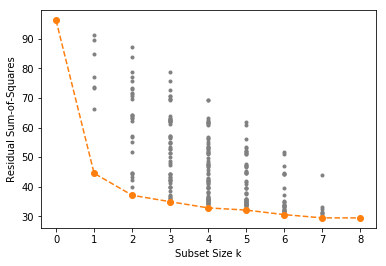

In [14]:
fig35 = plt.figure()
ax = fig35.add_subplot(1, 1, 1)

rss_min = []
for k in range(size_predictor+1):
    number_of_combinations = ncr(size_predictor, k)
    ols_list = ols_with_subset_size(data_x_train, vec_y, k)
    ax.plot(scipy.ones(number_of_combinations)*k, [d['rss'] for d in ols_list],
            'o', color='gray', markersize=3)
    ols_best = min(ols_list, key=op.itemgetter('rss'))
    rss_min.append(ols_best['rss'])
ax.plot(range(size_predictor+1), rss_min, 'o--', color='C1')
ax.set_xlabel('Subset Size k')
ax.set_ylabel('Residual Sum-of-Squares')
plt.show()

Note that the best subset of size 2, for example, need not include the variable that was in the best subset if size 1. The best-subset curve is necessarily decreasing, so **cannot be used to select the subset size $k$.** The question of how to choose $k$ involves the tradeoff between bias and variance, along with more subjective desire for parsimony. There are a number of criteria that one may use; typically we choose the smallest model that minimizes an estimate of the expected prediction error.

Many of the other approaches that we discuss in this chapter are similar, in that they use the training data to produce a sequence of models varying in complexity and indexed by a single parameter. In the next section we use cross-validation to estimate prediction error and select $k$; the $\text{AIC}$ criterion is a popular alternative.

## $\S$ 3.3.2. Forward- and Backward-Stepwise Selection

> Rather than search through all possible subsets, we can seek a good path through them.

### Forward-stepwise selection

*Forward-stepwise selection* starts with the intercept, and the sequentially adds into the model the predictor that most improves the fit. Clever updating algorithms can exploit the QR decomposition for the current fit to rapidly establish the next candidate. Like best-subset regression, the subset size $k$ must be determined.

Forward-stepwise selection is a *greedy algorithm*, producing a nested sequence of models. In this sense it might seem sub-optimal compared to best-subset selection. However, there are several reasons why it might be preferred:
* Computational; we can always compute the forward stepwise sequence (even when $p \gg N$).
* Statistical;forward stepwise is a more constrained search than the best subset selection, and will have lower variance, but perhaps more bias.

### Backward-stepwise selction

*Backward-stepwise selection* starts with the full model, and sequentially deletes the predictor that has the least impact on the fit. The candidate for dropping is the variable with the smallest Z-score. Backward selection can only be used when $N>p$, while forward selection can always be used.

On the prostate cancer example, best-subset, forward and backward selection all gave exactly the same sequence of terms.

In [15]:
"""FIGURE 3.6. Comparison of four subset-selection techniques on a
simulated linear regression problem Y = X^T * beta + epsilon"""
print('NOT YET IMPLEMENTED')

NOT YET IMPLEMENTED


## $\S$ 3.3.3. Forward-Stagewise Regression

See the textbook.

## $\S$ 3.3.4. Prostate Cancer Data Example (Continued)

With subset size $k$ determined via tenfold cross-validation, best-subset selection chose to use the two predictors $\texttt{lcvol}$ and $\texttt{lweight}$.

### Cross-validation, briefly

1. Cross-validation works by dividing the training data randomly into ten equal parts.
2. The learning method is fit -- for a range of values of the complexity parameter -- to nine-tenths of the data.
3. The prediction error is computed on the remaining one-tenth.
4. Repeat step 2 - step 3 for each one-tenth of the data, and the ten prediction error estimates are averaged.
5. Then we obtain an estimated prediction error curve as a function of the complexity parameter so that a proper complexity parameter can be chosen.

We have used the "one-standard-error" rule -- we pick the most parsimonious model within one standard error of the minimun. Such a rule acknowledges the fact that the tradeoff curve is estimated with error, and hence takes a conservative approach.

In [16]:
"""FIGURE 3.7. Estimated prediction error curves and their standard errors
for the best-subset selection via tenfold cross-validation.

Unfortunately, the result of this code does not agree with the textbook. It
is suspected that the scheme to split the trainig data for CV has an issue,
or the stderr of CV error may be wrongly calculated."""
def index_tenfold(n:int) ->scipy.ndarray:
    """Produce index array for tenfold CV with dataframe length n."""
    original_indices = scipy.arange(n)
    tenfold_indices = scipy.zeros(n)

    div, mod = divmod(n, 10)
    unit_sizes = [div for _ in range(10)]
    for i in range(mod):
        unit_sizes[i] += 1

    for k, unit_size in enumerate(unit_sizes):
        tenfold = scipy.random.choice(original_indices, unit_size,
                                   replace=False)
        tenfold_indices[tenfold] = k
        original_indices = scipy.delete(
            original_indices,
            [scipy.argwhere(original_indices == val) for val in tenfold],
        )
        # print(tenfold, original_indices)
    return tenfold_indices

In [17]:
indices_tenfold = index_tenfold(size_train)
cv_results = collections.defaultdict(list)

for cv in range(10):
    mask_cv = indices_tenfold != cv
    size_cv_train = sum(mask_cv == True)

    df_x = data_x_train[mask_cv]
    v_y = vec_y[mask_cv]
    
    for k in range(size_predictor+1):
        ols = ols_with_subset_size(df_x, v_y, k)
        ols_best = min(ols, key=op.itemgetter('rss'))
        cv_results[k].append(ols_best['rss']/size_cv_train)

rss_average = [sum(rss)/10 for _, rss in cv_results.items()]
rss_stderr = [math.sqrt((sum(scipy.array(rss)**2)-10*rss_average[k]**2)/9)
              for k, rss in cv_results.items()]

/usr/local/Cellar/ipython/7.2.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


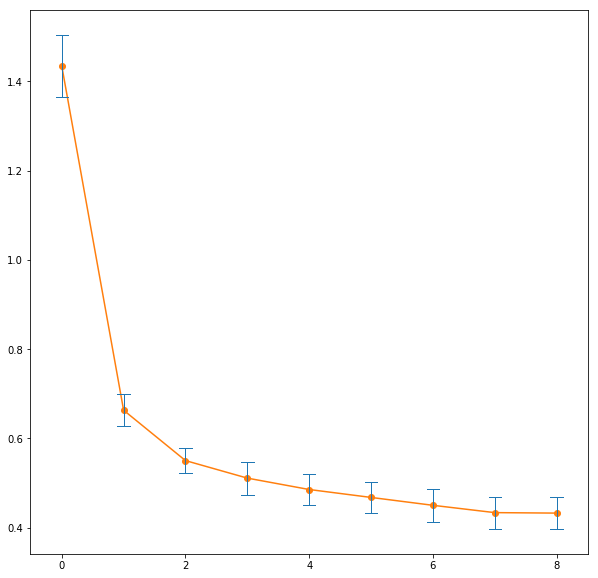

In [18]:
fig37 = plt.figure(figsize=(10, 10))
ax = fig37.add_subplot(1, 1, 1)
ax.plot(list(cv_results.keys()), rss_average, 'o-', color='C1')
for k, (ave, stderr) in enumerate(zip(rss_average, rss_stderr)):
    ax.plot([k, k], [ave-stderr, ave+stderr], color='C0', linewidth=1)
    ax.plot([k-.1, k+.1], [ave-stderr, ave-stderr], color='C0', linewidth=1)
    ax.plot([k-.1, k+.1], [ave+stderr, ave+stderr], color='C0', linewidth=1)
plt.show()

In [19]:
"""Table 3.3. Estimated coefficients ad test error result for the
best-subset selection applied to the prostate data

Even though the above CV does not select k = 2, we take k = 2 anyway as the
book does. Also I couldn't figure out where the Std Error = 0.143 comes
from.
"""
ols_k2 = ols_with_subset_size(data_x_train, vec_y, k=2)
ols_k2_best = min(ols_k2, key=op.itemgetter('rss'))

df_x_test = data_x_test[list(ols_k2_best['column_names'])]
mat_x_test = scipy.hstack((scipy.ones((size_test, 1)), df_x_test.as_matrix()))
vec_y_test_fitted = mat_x_test @ ols_k2_best['beta']

print('{0:>15} {1:>15}'.format('Term', 'Best Subset'))
print('-'*31)
print('{0:>15} {1:>15.3f}'.format('Intercept', ols_k2_best['beta'][0]))
for idx, col_name in enumerate(ols_k2_best['column_names']):
    print('{0:>15} {1:>15.3f}'.format(col_name, ols_k2_best['beta'][idx+1]))
print('-'*31)
print('{0:>15} {1:>15.3f}'.format(
    'Test Error',
    sum((vec_y_test-vec_y_test_fitted)**2)/size_test),
)

           Term     Best Subset
-------------------------------
      Intercept           2.477
         lcavol           0.736
        lweight           0.315
-------------------------------
     Test Error           0.492


/usr/local/Cellar/ipython/7.2.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/usr/local/Cellar/ipython/7.2.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':


# $\S$ 3.4. Shrinkage Methods

By retaining a subset of the predictors and discarding the rest, subset selection produces a model that is interpretable and has possibly lower prediction error than the full model. **However, because it is a discrete process -- variables are either retained or discarded -- it often exhibits high variance, and so doesn't reduce the prediction error of the full model.** Shrinkage methods are more continuous, and don't suffer as much from high variability.

## $\S$ 3.4.1. Ridge Regression

Ridge regression shrinks the regression coefficients by imposing a penalty on their size. The ridge coefficients minimize a penalized residual sum of squares,

\begin{equation}
\hat\beta^{\text{ridge}} = {\arg\min}_{\beta}\left\lbrace \sum_{i=1}^N\left( y_i - \beta_0 - \sum_{j=1}^p x_{ij}\beta_j \right)^2 +\lambda\sum_{j=1}^p \beta_j^2 \right\rbrace,
\end{equation}

where $\lambda \ge 0$ is a complexity parameter that controls the amount of shrinkage: the larger the $\lambda$, the greater the amount of shrinkage. The idea of penalizing by the sum-of-squares of the parameters is also used in neural networks, a.k.a. *weight decay* (Chapter 11).

An equivalent way to write the ridge problem is to make explicit the size constraint on the parameters, as

\begin{equation}
\hat\beta^{\text{ridge}} = {\arg\min}_\beta \sum_{i=1}^N \left( y_i - \beta_0 - \sum_{j=1}^p x_{ij}\beta_j \right)^2 \text{ subject to } \sum_{j=1}^p \beta_j^2 \le t,
\end{equation}

where $t$ has a one-to-one correspondence with $\lambda$.

When there are many correlated variables in a linear regression model, their coefficients can become poorly determined and exhibit high variance. A wildly large positive coefficient on one variable can be canceled by a similarly large negative coefficient on its correlated cousin. By imposing a size constraint on the coefficients, this problem is alleviated.

### Scaling and centering

The ridge solutions are not equivariant under scaling of the inputs, and so  one normally standardizes the inputs before solving the ridge problem.

Also notice that the intercept $\beta_0$ has been left out of the penalty term. Penalization of the intercept would make the procedure depend on the origin chosen for $Y$; i.e., adding a constant $c$ to each of the targets $y_i$ (i.e. simply shifting) would not simply result in a shift of the predictions by the same constant $c$.

It can be shown that the ridge solution can be separated into two parts, after reparametrization using *centered* inputs: Each $x_{ij}$ gets replaced by $x_{ij}-\bar{x}_j$.
1. We estimate $\beta_0$ by the mean response $\bar{y} = \frac{1}{N}\sum_1^N y_i$.
2. The remaining coefficients get estimated by a ridge regression without intercept, using centered $x_{ij}$.

Henceforth we assume that this centering has been done, so that the input matrix $\mathbf{X}$ has $p$ columns rather than $p+1$.

### Matrix form

\begin{equation}
\text{RSS}(\lambda) = (\mathbf{y}-\mathbf{X}\beta)^T(\mathbf{y}-\mathbf{X}\beta) + \lambda\beta^T\beta
\end{equation}

The ridge regression solutions are easily seen to be

\begin{equation}
\hat\beta^{\text{ridge}} = \left( \mathbf{X}^T\mathbf{X} + \lambda\mathbf{I} \right)^{-1}\mathbf{X}^T\mathbf{y},
\end{equation}

where $\mathbf{I}$ is the $p\times p$ identity matrix. Notice that the ridge solution is again a linear function of $\mathbf{y}$ by the choice of quadratic penalty $\beta^T\beta$, resulting in addition of a positive constant to the diagonal of $\mathbf{X}^T\mathbf{X}$ before inversion. This makes the problem nonsingular, even if $\mathbf{X}^T\mathbf{X}$ is not of full rank. It was actually the main motivation for ridge regression when it was first introduced in statistics (Hoerl and Kennard, 1970).

In [20]:
"""FIGURE 3.8. Profiles of ridge coefficients for the prostate cancer
example as tuning parameter lambda is varied.

Coefficients are plotted versus df(lambda), the effective degrees of
freedom. In case of orthonormal inputs, the ridge estimates are just a
scaled version of the least squares estimates;
beta_ridge = beta_ols/(1+lambda)
"""
import scipy
import scipy.stats
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
data = pd.read_csv('../data/prostate/prostate.data', delimiter='\t',
                   index_col=0)
data_y = data.pop('lpsa')
mask_train = data.pop('train')

data_x_train = data[mask_train == 'T']
data_y_train = data_y[mask_train == 'T']
beta_intercept = data_y_train.mean()
# Centering for the training data
data_y_train_centered = data_y_train.subtract(beta_intercept)
data_x_train_normalized = data_x_train.apply(scipy.stats.zscore)
vec_y = data_y_train_centered.as_matrix()

data_x_test = data[mask_train == 'F']
data_x_test_normalized = data_x_test.apply(scipy.stats.zscore)
data_y_test = data_y[mask_train == 'F']
vec_y_test = data_y_test.as_matrix()

size_train = sum(mask_train == 'T')
size_test = sum(mask_train == 'F')
size_predictor = data_x_train.columns.size

/usr/local/Cellar/ipython/7.2.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':
/usr/local/Cellar/ipython/7.2.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:17: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


In [22]:
def lambdas_from_edf(singular_squared:scipy.ndarray, interval:int) ->scipy.ndarray:
    """Given squared singular values of data matrix, calculate the lambdas
    with `interval` parameter to split unit intervals s.t. the resulting
    effective degrees of freedom are equidistant with 1/interval, via the
    Newton-Raphson method. e.g., if interval = 10, it produces lambdas for
    0, 0.5, 0.6, 0.7, ..."""
    p = singular_squared.size
    edfs = scipy.linspace(.5, p-.5, (p-1)*interval+1)
    threshold = 1e-3
    lambdas = []
    for edf in edfs:
        # Newton-Raphson
        lambda0 = (p-edf)/edf
        lambda1 = 1e6
        diff = lambda1 - lambda0
        while diff > threshold:
            num = (singular_squared/(singular_squared+lambda0)).sum()-edf
            denom = (singular_squared/((singular_squared+lambda0)**2)).sum()
            lambda1 = lambda0 + num/denom
            diff = lambda1 - lambda0
            lambda0 = lambda1
        lambdas.append(lambda1)
    lambdas.append(0)
    edfs = scipy.concatenate(([0], edfs, [p]))
    return edfs, scipy.array(lambdas)

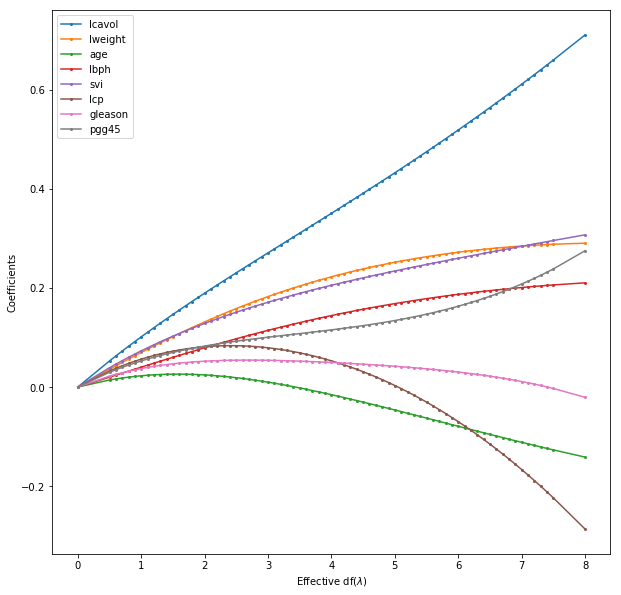

In [23]:
u, s, vh = scipy.linalg.svd(data_x_train_normalized, full_matrices=False)
s2 = s**2
edfs, lambdas = lambdas_from_edf(s2, 10)
# beta_ols = vh.T @ scipy.diag(scipy.reciprocal(s)) @ u.T @ vec_y
# print(beta_ols)
beta_ridge_array = [scipy.zeros(size_predictor)]
for lamb in lambdas:
    mat_diag = scipy.diag(s/(s2+lamb))
    beta_ridge = vh.T @ mat_diag @ u.T @ vec_y
    beta_ridge_array.append(beta_ridge)
beta_ridge_array = scipy.array(beta_ridge_array)

fig38 = plt.figure(figsize=(10, 10))
ax = fig38.add_subplot(1, 1, 1)
ax.plot(edfs, beta_ridge_array, 'o-', markersize=2)
ax.set_ylabel('Coefficients')
ax.set_xlabel('Effective df($\lambda$)')
ax.legend(data_x_train.columns)
plt.show()

### From the Bayesian point of view

Ridge regression can also be derived as the mean or mode of a posterior distribution, with a suitably chosen prior distribution.

Suppose

\begin{align}
y_i &\sim N(\beta_0+x_i^T\beta, \sigma^2) \\
\beta_j &\sim \text{ i.i.d. }N(0, \tau^2)
\end{align}

Then the log-posterior density of $\beta$, with $\tau^2$ and $\sigma^2$ assumed known, is equal to the expression

\begin{equation}
\sum_{i=1}^N\left( y_i - \beta_0 - \sum_{j=1}^p x_{ij}\beta_j \right)^2 +\frac{\sigma^2}{\tau^2}\sum_{j=1}^p \beta_j^2,
\end{equation}

which is the penalized residual sum of squares with $\lambda = \sigma^2/\tau^2$. Thus the ridge estimate is the mode of the posterior distribution; since the distribution is Gaussian, it is also the posterior mean.

### The singular value decomposition (SVD)

The SVD of the centered input matrix $\mathbf{X}$ gives us some additional insight into the nature of ridge regression. The SVD of the $N\times p$ matrix $\mathbf{X}$ has the form

\begin{equation}
\mathbf{X} = \mathbf{UDV}^T,
\end{equation}

where
* $\mathbf{U}$ is $N\times p$ orthogonal matrix, with the columns of $\mathbf{U}$ spanning the $\text{col}(\mathbf{X})$
* $\mathbf{V}$ is $p\times p$ orthogonal matrix, with the columns of $\mathbf{V}$ spanning the $\text{row}(\mathbf{X})$
* $\mathbf{D}$ is a $p\times p$ diagonal matrix, with diagonal entries  
$d_1 \ge d_2 \ge \cdots \ge d_p \ge 0$ called the singular values of $\mathbf{X}$.
* If one or more values $d_j = 0$, $\mathbf{X}$ is singular.

Using the SVD we can write the least squares fitted vector as

\begin{align}
\mathbf{X}\hat\beta^{\text{ls}} &= \mathbf{X}(\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y} \\
&= \mathbf{UU}^T\mathbf{y}.
\end{align}

Note
* $\mathbf{U}^T\mathbf{y}$ are the coordinates of $\mathbf{y}$ w.r.t. the orthonormal basis $\mathbf{U}$.
* the similarity with QR decomposition; $\mathbf{Q}$ and $\mathbf{U}$ are generally different orthogonal bases for $\text{col}(\mathbf{X})$.

Now the ridge solutions are

\begin{align}
\mathbf{X}\hat\beta^{\text{ridge}} &= \mathbf{X}(\mathbf{X}^T\mathbf{X} + \lambda\mathbf{I})^{-1}\mathbf{X}^T\mathbf{y} \\
&= \mathbf{UD}(\mathbf{D}^2 + \lambda\mathbf{I})^{-1}\mathbf{DU}^T\mathbf{y} \\
&= \sum_{j=1}^p \mathbf{u}_j \frac{d_j^2}{d_j^2+\lambda}\mathbf{u}_j^T\mathbf{y},
\end{align}

where the $\mathbf{u}_j$ are the columns of $\mathbf{U}$. The ridge solution then shrinks these coordinates by the factors $d_j^2/(d_j^2+\lambda)$. This means that a greater amount of shrinkage is applied to the coordinates of basis vectors with smaller $d_j^2$. Then what does a small value of $d_j^2$ mean?

### The SVD and the principal components

The SVD of the centered matrix $\mathbf{X}$ is another way of expressing the *principal components* of the variables in $\mathbf{X}$. The sample covariance matrix is given by

\begin{equation}
\mathbf{S} = \frac{1}{N}\mathbf{X}^T\mathbf{X},
\end{equation}

and via the SVD,

\begin{equation}
\mathbf{X}^T\mathbf{X} = \mathbf{VD}^2\mathbf{V}^T,
\end{equation}

which is the *eigen decomposition* of $\mathbf{X}^T\mathbf{X}$ (and of $\mathbf{S}$, up to a factor $N$). The eigenvectors $v_j$ (columns of $\mathbf{V}$) are also called the *principal components* (or Karhunen-Loeve) directions of $\mathbf{X}$. The first principal component direction $v_1$ has the property that $\mathbf{z}_1 = \mathbf{X}v_1$ has the larger sample projected variance than any other direction. This sample variance is easily seen to be

\begin{equation}
\text{Var}(\mathbf{z}_1) = \text{Var}(\mathbf{X}v_1) = \frac{d_1^2}{N},
\end{equation}

and in fact $\mathbf{z}_1 = \mathbf{X}v_1 = \mathbf{u}_1 d_1$. The derived variable $z_1$ is called the first principal component of $\mathbf{X}$, and hence $\mathbf{u}_1$ is the normalized first principal component. And subsequent principal components $z_j$ have maximum variance $d_j^2/N$, subject to being orthogonal to the earlier ones. Conversely the last principal component has minimum variance. Hence the small singular values $d_j$ correspond to directions in the $\text{col}(\mathbf{X})$ having small variance, and ridge regression shrinks these directions the most. In simple words, it does not care what seems not worth. See FIGURE 3.9 for the graphical representation of the principal components.

Ridge regression protects against the potentially high variance of gradients estimated in the short directions.

### The effective degrees of freedom

In FIGURE 3.7 we have plotted the estimated prediction error versus the quantity

\begin{align}
\text{df}(\lambda) &= \text{tr}\left( \mathbf{X}(\mathbf{X}^T\mathbf{X} + \lambda\mathbf{I})^{-1}\mathbf{X}^T \right), \\
&= \text{tr}(\mathbf{H}_\lambda) \\
&= \sum_{j=1}^p \frac{d_j^2}{d_j^2+\lambda}.
\end{align}

This monotone decreasing function of $\lambda$ is the *effective degrees of freedom* of the ridge regression fit. Usually in a linear-regression fit, the degrees-of-freedom of the fit is $p$, the number of free parameters. The idea is that although all $p$ coefficients in a ridge fit will be non-zero, they are fit in a restricted fashion controlled by $\lambda$. Note that

\begin{align}
\text{df}(\lambda) &= p \text{ when }\lambda = 0, \\
\text{df}(\lambda) &\rightarrow 0 \text{ as }\lambda \rightarrow \infty.
\end{align}

Of course there is always an additional one degree of freedom for the intercept, which was removed *apriori*. This definition is motivated in more detail in Section 3.4.4 and Sections 7.4-7.6.

In [24]:
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [25]:
"""FIGURE 3.7. CV result of the ridge regression"""
import collections
import math

from module import cv

cv10_indices = cv.index_tenfold(size_train)
cv_beta = collections.defaultdict(list)
cv_rss = collections.defaultdict(list)

for cv_idx in range(10):
    mask_cv = cv10_indices != cv_idx
    size_cv_train = (mask_cv == True).size
    df_x = data_x_train_normalized[mask_cv]
    cv_x = df_x.as_matrix()
    v_y = vec_y[mask_cv]

    # Exceptional case for lambda = infinity, or edf = 0 (constant model)
    v_y_mean= v_y.mean()
    cv_rss[0].append(((v_y-v_y_mean)**2).sum()/size_cv_train)
    
    u, s, vh = scipy.linalg.svd(cv_x, full_matrices=False)
    s2 = s**2
    edfs, lambdas = lambdas_from_edf(s2, 2)

    for edf, lamb in zip(edfs[1:], lambdas):
        mat_diag = scipy.diag(s/(s2+lamb))
        beta_ridge = vh.T @ mat_diag @ u.T @ v_y
        cv_beta[edf].append(beta_ridge)
        cv_y_fitted = cv_x @ beta_ridge
        cv_rss[edf].append(((v_y-cv_y_fitted)**2).sum()/size_cv_train)

cv_rss_average = [sum(rss)/len(rss) for _, rss in cv_rss.items()]
cv_rss_stderr = [math.sqrt(((scipy.array(rss)**2).sum()-sum(rss)**2/10)/9)
                 for _, rss in cv_rss.items()]

/usr/local/Cellar/ipython/7.2.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  from ipykernel import kernelapp as app


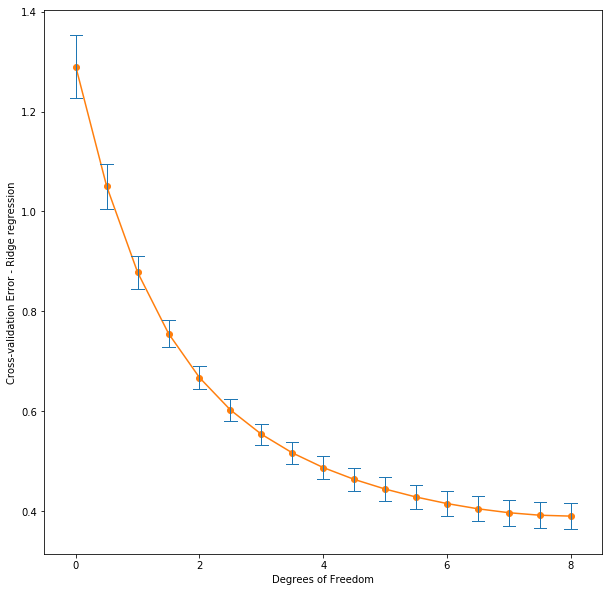

In [26]:
fig27 = plt.figure(figsize=(10, 10))
ax = fig27.add_subplot(1, 1, 1)
ax.plot(edfs, cv_rss_average, 'o-', color='C1')
for k, (ave, stderr) in enumerate(zip(cv_rss_average, cv_rss_stderr)):
    ax.plot([k/2, k/2], [ave-stderr, ave+stderr], color='C0', linewidth=1)
    ax.plot([k/2-.1, k/2+.1], [ave-stderr, ave-stderr],
            color='C0', linewidth=1)
    ax.plot([k/2-.1, k/2+.1], [ave+stderr, ave+stderr],
            color='C0', linewidth=1)
ax.set_ylabel('Cross-validation Error - Ridge regression')
ax.set_xlabel('Degrees of Freedom')
plt.show()

In [27]:
"""Table 3.3. for the ridge regression

Use lambda = 5 as the textbook does, even though the previous CV results
do not agree with.

Please note that this table does not exactly reproduce the output from the
textbook.
"""
lambda_from_cv = lambdas[scipy.where(edfs == 5)[0]-1]  # lambda with edf = 5

u, s, vh = scipy.linalg.svd(data_x_train_normalized, full_matrices=False)
s2 = s**2

mat_diag = scipy.diag(s/(s2+lambda_from_cv))
beta_ridge = vh.T @ mat_diag @ u.T @ vec_y

mat_x_test = data_x_test_normalized.as_matrix()
vec_y_test_fitted = mat_x_test @ beta_ridge

print('{0:>15} {1:>15}'.format('Term', 'Best Subset'))
print('-'*31)
print('{0:>15} {1:>15.3f}'.format('Intercept', beta_intercept))
for idx, col_name in enumerate(data.columns):
    print('{0:>15} {1:>15.3f}'.format(col_name, beta_ridge[idx]))
print('-'*31)
print('{0:>15} {1:>15.3f}'.format(
    'Test Error',
    ((vec_y_test-vec_y_test_fitted-beta_intercept)**2).sum()/size_test),
)

           Term     Best Subset
-------------------------------
      Intercept           2.452
         lcavol           0.451
        lweight           0.257
            age          -0.054
           lbph           0.173
            svi           0.240
            lcp          -0.011
        gleason           0.040
          pgg45           0.140
-------------------------------
     Test Error           0.503


/usr/local/Cellar/ipython/7.2.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:17: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


## $\S$ 3.4.2. The Lasso

The lasso estimate is defined by

\begin{equation}
\hat\beta^{\text{lasso}} = \arg\min_\beta \sum_{i=1}^N \left( y_i-\beta_0-\sum_{j=1}^p x_{ij}\beta_j \right)^2 \text{ subject to } \sum_{j=1}^p |\beta_j| \le t,
\end{equation}

Just as in ridge regression, we can re-parametrize the constant $\beta_0$ by standardizing the predictors; $\hat\beta_0 = \bar{y}$, and thereafter we fit a model without an intercept.

In the signal processing literature, the lasso is a.k.a. *basis pursuit* (Chen et al., 1998).

Also the lasso problem has the equivalent *Lagrangian form*

\begin{equation}
\hat\beta^{\text{lasso}} = \arg\min_\beta \left\lbrace \frac{1}{2}\sum_{i=1}^N \left( y_i-\beta_0-\sum_{j=1}^p x_{ij}\beta_j \right)^2 + \lambda\sum_{j=1}^p |\beta_j| \right\rbrace,
\end{equation}

which is similar to the ridge problem as the $L_2$ ridge penalty is replaced by the $L_1$ lasso penalty. **This lasso constraint makes the solutions nonlinear in the $y_i$,** and there is no closed form expresssion as in ridge regression. And computing the above lasso solution is a quadratic programming problem, although efficient algorithms, introduced in $\S$ 3.4.4, are available for computing the entire path of solution as $\lambda$ varies, with the same computational cost as for ridge regression.

Note that

* If $t \gt t_0 = \sum_1^p \lvert\hat\beta_j^{\text{ls}}\rvert$, then $\hat\beta^{\text{lasso}} = \hat\beta^{\text{ls}}$.
* Say, for $t = t_0/2$, then the least squares coefficients are shrunk by about $50\%$ on average.  
However, the nature of the shrinkage is not obvious, and we investigate it further in $\S$ 3.4.4.

In FIGURE 3.7, for ease of interpretation, we have plotted the lasso prediction error estimates versus the standardized parameter

\begin{equation}
s = \frac{t}{\sum_1^p \lvert\hat\beta_j\rvert}.
\end{equation}

A value $\hat s \approx 0.36$ was chosen by 10-fold cross-validation; this caused four coefficients to be set to zero (see Table 3.3). The resulting model has the second lowest test error, slightly lower than the full least squares model, but the standard errors of the test error estimates are fairly large.

FIGURE 3.10 is discussed after implementing the lasso algorithm in $\S$ 3.4.4.

## $\S$ 3.4.3. Discussion: Subset Selection, Ridge Regression, and the Lasso

### Explicit solutions in the ideal situation

In the case of an orthonormal input matrix $\mathbf{X}$, the three procecures have explicit solutions as below.

* Best subset (size $M$) drops all variables with coefficients smaller than the $M$th largest; this is a form of "hard-thresholding".  
\begin{equation}
\hat\beta_j\cdot I\left( \lvert\hat\beta_j\rvert \ge \lvert\hat\beta_{(M)}\rvert \right)
\end{equation}
* Ridge does a proportional shrinkage.  
\begin{equation}
\frac{\hat\beta_j}{1+\lambda}
\end{equation}
* Lasso translates each coefficient by a constant factor $\lambda$, truncating at zero. This is called "soft-thresholding".  
\begin{equation}
\text{sign}\left( \hat\beta_j \right)\left( \lvert\hat\beta_j\rvert - \lambda \right)_+
\end{equation}

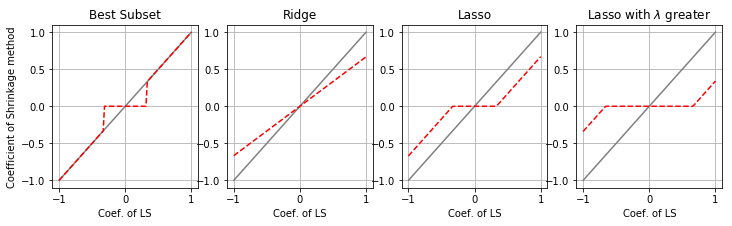

In [36]:
import scipy
import matplotlib.pyplot as plt

x = scipy.linspace(-1, 1, 100)

y_best_subset = x.copy()
y_best_subset[scipy.absolute(y_best_subset) <= .33] = 0

y_ridge = x/1.5

y_lasso = x.copy()
y_lasso[scipy.absolute(y_lasso) <= .33] = 0
y_lasso[y_lasso > .33] -= .33
y_lasso[y_lasso < -.33] += .33
        

y_lasso2 = x.copy()
y_lasso2[scipy.absolute(y_lasso2) <= .66] = 0
y_lasso2[y_lasso2 > .66] -= .66
y_lasso2[y_lasso2 < -.66] += .66
      
fig34 = plt.figure(figsize=(12, 3))
ax1 = fig34.add_subplot(1, 4, 1)
ax1.plot(x, x, color='gray')
ax1.plot(x, y_best_subset, 'r--')
ax1.set_title('Best Subset')
ax1.grid()

ax2 = fig34.add_subplot(1, 4, 2)
ax2.plot(x, x, color='gray')
ax2.plot(x, y_ridge, 'r--')
ax2.set_title('Ridge')
ax2.grid()

ax3 = fig34.add_subplot(1, 4, 3)
ax3.plot(x, x, color='gray')
ax3.plot(x, y_lasso, 'r--')
ax3.set_title('Lasso')
ax3.grid()

ax4 = fig34.add_subplot(1, 4, 4)
ax4.plot(x, x, color='gray')
ax4.plot(x, y_lasso2, 'r--')
ax4.set_title('Lasso with $\lambda$ greater')
ax4.grid()


ax1.set_ylabel('Coefficient of Shrinkage method')
ax1.set_xlabel('Coef. of LS')
ax2.set_xlabel('Coef. of LS')
ax3.set_xlabel('Coef. of LS')
ax4.set_xlabel('Coef. of LS')

plt.show()

NOTE: Figure 3 vs 4: Increasing $\lambda$ leads to increase of bias in the coefficients of Lasso.

### Back to the reality; the nonorthonormal case

FIGURE 3.11 helps understand their relationship. Please consult with the textbook.
![Fig 3.11](fig3-11.png)


### Generalization to Bayes estimates

Consider the criterion, for $q \ge 0$,

\begin{equation}
\tilde\beta = \arg\min_\beta \left\lbrace \sum_{i=1}^N \left( y_i - \beta_0 - \sum_{j=1}^p x_{ij}\beta_j \right)^2 + \lambda\sum_{j=1}^p\lvert\beta_j\rvert^q\right\rbrace
\end{equation}

See FIGURE 3.12 in the textbook for the contours of $\sum_j\lvert\beta_j\rvert^q$.

Thinking of $\lvert\beta_j\rvert^q$ as the log-prior density for $\beta_j$, these are also the equicontours of the prior distrobution of the parameters.
* $q=0$ $\Rightarrow$ variable subset selction, as the penalty simply counts the number of nonzero parameters,
* $q=1$ $\Rightarrow$ Laplace distribution with density  

\begin{equation}
\frac{1}{2\tau}\exp\left(-\lvert\beta\rvert/\tau\right),
\end{equation}
where $\tau = 1/\lambda$. In this view, the lasso, ridge, and best subset selection are Bayes estimates with different priors. Note, however, that they are derived as posterior modes, that is, maximizers of the posterior. It is more common to use the mean of the posterior as the Bayes estimate. Ridge solution is also the posterior mean, but the lasso and best subset selection are not.

Note that the lasso case is the smallest $q$ such that the constraint region is convex; non-convext constraint regions make the optimization problem more difficult.

We might try using other values of $q$ besides $0$, $1$, or $2$. Although one might consider estimating $q$ from data, our experience is that it is not worth the effort for the extra variance incurred.

Although this is the case, with $q \gt 1$, $\lvert\beta_j\rvert^q$ is differentiable at $0$, and so does not share the ability of lasso ($q=1$) for setting coefficients exactly to zero. Partly for this reason as well as for computational tractability, Zou and Hastie (2005) introduced the *elastic-net* penalty, introduced in $\S$ 18.4.

**Elastic Net**

$$ \lambda \sum_{j=1}^p ( \alpha \beta_j^2 + (1- \alpha) |\beta_j|) $$

## $\S$ 3.4.4. Least Angle Regression

Least Angle Regression (LAR) is a relative newcomer (Efron et al., 2004), and can be viewed as **a kind of "democratic" version of forward stepwise regression** ($\S$ 3.3.2). Forward stepwise regression builds a model sequentially, adding one variable at a time. At each step, it identifies the best variable to include in the *active set*, and then updates the least squares fit to include all the active variables.

LAR uses a similar strategy, but only enters "as much" of a predictor as it deserves.
1. Identify the variable most correlated with the response.
2. Rather than fit this variable completely, LAR moves the coefficient of this variable continuously toward its least-sqaures value (causing its correlation with the evolving residual to decrease in absolute value).
3. As soon as another variable "catches up" in terms of correlation with residual, the process is paused.
4. The second variable then joins the active set, and their coefficients are moved together in a way that keeps their correlations tied and decreasing.
5. This process is continued until all the variables are in the model, and ends at the full least-squares fit.

Below is the algorithm in detail.

### Algorithm 3.2. Least Angle Regression

1. Standardize the predictors to have mean zero and unit norm.  
Start with the residual $\mathbf{r} = \mathbf{y} - \bar{\mathbf{y}}$, and coefficients $\beta_0 = \beta_1 = \cdots = \beta_p = 0$.
2. Find the predictor $\mathbf{x}_j$ most correlated with $\mathbf{r}$.
3. Move $\beta_j$ from $0$ towards its least-squares coefficient $\langle\mathbf{x}_j,\mathbf{r}\rangle$, until some other competitor $\mathbf{x}_k$ has as much correlation with the current residual as does $\mathbf{x}_j$.
4. Move $\beta_j$ and $\beta_k$ in the direction defined by their joint least squares coefficient of the current residual on $(\mathbf{x}_j,\mathbf{x}_k)$, until some other competitor $\mathbf{x}_l$ has as much correlation with the current residual.
5. Continue in this way until all $p$ predictors have been entered. After $\min(N-1,p)$ steps, we arrive at the full least-squares solution.

The termination condition in step 5 requires some explanation. If $p > N-1$, the LAR algorithm reaches a zero residual solution after $N-1$ steps (the $-1$ is because we have centered the data).

Suppose
* $\mathcal{A}_k$ is the active set of variables at the beginning of the $k$th step,
* $\beta_{\mathcal{A}_k}$ is the coefficient vector for these variables at this step.
There will be $k-1$ nonzero values, and the one just entered will be zero. If $\mathbf{r}_k = \mathbf{y} - \mathbf{X}_{\mathcal{A}_k}\beta_{\mathcal{A}_k}$ is the current residual, then the direction for this step is

\begin{equation}
\delta_k = \left( \mathbf{X}_{\mathcal{A}_k}^T\mathbf{X}_{\mathcal{A}_k} \right)^{-1}\mathbf{X}_{\mathcal{A}_k}^T \mathbf{r}_k.
\end{equation}

The coefficient profile then evolves as

\begin{equation}
\beta_{\mathcal{A}_k}(\alpha) = \beta_{\mathcal{A}_k} + \alpha\delta_k,
\end{equation}

and this direction keeps the correlations tied and decreasing (See Exercise 3.23).

If the fit vector at the beginning of this step is $\hat{\mathbf{f}}_k$, then it evolves as

\begin{equation}
\hat{\mathbf{f}}_k(\alpha) = \hat{\mathbf{f}}_k + \alpha\mathbf{u}_k,
\end{equation}

where $\mathbf{u}_k = \mathbf{X}_{\mathcal{A}_k}\delta_k$ is the new fit direction.

The name "least angle" arises from a geometrical interpretation of this process; $\mathbf{u}_k$ makes the smallest (and equal) angle with each of the predictors in $\mathcal{A}_k$ (Exercise 3.24). See FIGURE 3.14 and 3.15 in the textbook for the LARS simulation.

Note that, by construction, the coefficients in LAR change in a piecewise linear fashion, and we do not need to take small steps and recheck the correlations in step 3; using knowledge of the covariance of the predictors and the piecewise linearity of the algorithm, we can work out the exact step length at the beginning of each step (Exercise 3.25).

In [29]:
"""FIGURE 3.10. LARS(lasso) coefficients profile on prostate cancer data"""
import scipy
import scipy.stats
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
df = pd.read_csv('../data/prostate/prostate.data', delimiter='\t',
                 index_col=0)
dfy = df.pop('lpsa')
dfmask = df.pop('train')
size_predictor = df.columns.size

dfmask_train = dfmask == 'T'
dfx_train = df[dfmask_train]
dfy_train = dfy[dfmask_train]
size_train = dfmask_train.sum()

dfmask_test = dfmask == 'F'
dfx_test = df[dfmask_train]
dfy_test = dfy[dfmask_train]
size_test = dfmask_train.sum()

# Centering for the training data
meany_train = dfy_train.mean()
dfy_train_centered = dfy_train.subtract(meany_train)
dfx_train_centered = dfx_train.subtract(dfx_train.mean())

normx = scipy.sqrt((dfx_train_centered**2).sum())
dfx_train_scaled = dfx_train_centered.divide(normx)

matx = dfx_train_scaled.as_matrix()
vecy = dfy_train_centered.as_matrix()

/usr/local/Cellar/ipython/7.2.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:25: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/usr/local/Cellar/ipython/7.2.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:26: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


In [31]:
"""Main loop for LAR

Reference:
Least Angle Regression, Efron et al., 2004, The Annals of Statistics
"""
# Initial data
signs = scipy.zeros(size_predictor)
betas = scipy.zeros(size_predictor)
indices_predictor = scipy.arange(size_predictor)
vecy_fitted = scipy.zeros_like(vecy)
beta_lars = [[0]*size_predictor]

for k in range(size_predictor):
    vecc = matx.T @ (vecy-vecy_fitted)
    vecc_abs = scipy.absolute(vecc)
    
    maxc = vecc_abs.max()
    mask_maxc = scipy.isclose(vecc_abs, maxc)
    active = indices_predictor[mask_maxc]
    signs = scipy.where(vecc[active] > 0, 1, -1)

    matx_active = signs*matx[:, active]

    u, s, vh = scipy.linalg.svd(matx_active, full_matrices=False)
    matg = vh.T @ scipy.diag(s**2) @ vh
    matg_inv = vh.T @ scipy.diag(scipy.reciprocal(s**2)) @ vh
    vec1 = scipy.ones(len(active))
    scalara = (matg_inv.sum())**(-.5)

    vecw = scalara * matg_inv.sum(axis=1)
    vecu = matx_active @ vecw

    veca = matx.T @ vecu

    if k < size_predictor-1:
        inactive = indices_predictor[scipy.invert(mask_maxc)]
        arr_gamma = scipy.concatenate([(maxc-vecc[inactive])/(scalara-veca[inactive]),
                                       (maxc+vecc[inactive])/(scalara+veca[inactive])])
        scalargamma = arr_gamma[arr_gamma > 0].min()
    else:
        scalargamma = maxc/scalara

    vecy_fitted += scalargamma*vecu
    betas[active] += scalargamma*signs
    beta_lars.append(list(betas))

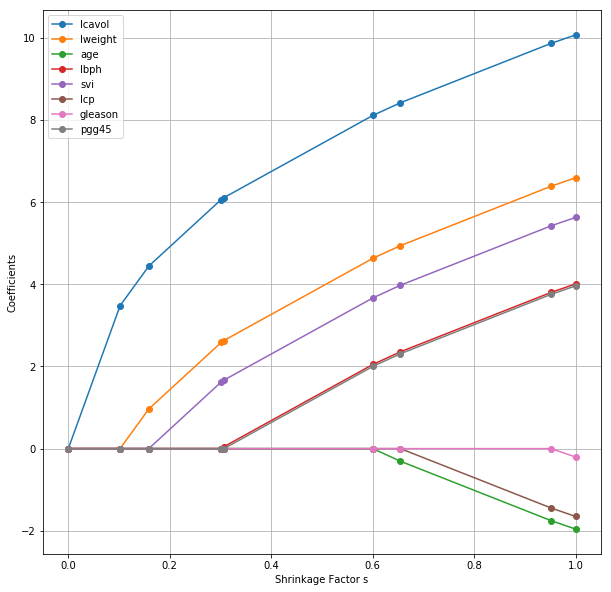

In [32]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
l1length_ols_beta = sum(abs(coeff) for coeff in beta_lars[-1])
l1length_lars_beta = [sum(abs(coeff) for coeff in beta)/l1length_ols_beta for beta in beta_lars]
ax.plot(l1length_lars_beta, beta_lars, 'o-')
ax.grid()
ax.set_xlabel('Shrinkage Factor s')
ax.set_ylabel('Coefficients')
ax.legend(dfx_train.columns)
plt.show()

For the prostate data, the LAR coefficient profile turns out to be identical to the lasso profile in FIGURE 3.10, which never crosses zero. These observations lead to a simple modification of the LAR algorithm that gives the entire lasso path, which is also piecewise-linear.

### Algorithm 3.2a. Least Angle Regression: Lasso Modification

4a. If a non-zero coefficient hits zero, drop its variable from the active set and recompute the current joint least squares direction.

### Computational efficiency

The LAR (lasso) algorithm is extremely efficient, requiring the same order of computation as that of a single least squares fit using the $p$ predictors. LAR always take $p$ steps to get to the full least squares estimates. The lasso path can have more than $p$ steps, although the two are often quite similar. Also the LAR algorithm with the lasso modification is efficient, especially when $p \gg N$. Osborne et al. (2000) also discovered a piecewise-linear path for computing the lasso, which they called a *homotopy* algorithm.

### Heuristic argument for why LAR and lasso are so similar

Although the LAR algorithm is stated in terms of correlations, if the input features are standardized, it is equivalent and easier to work with inner-products.

Let $\mathcal{A}$ be the active set at some stage, tied in their absolute inner-product with the current residuals $\mathbf{y}-\mathbf{X}\beta$, expressed as

\begin{equation}
\mathbf{x}_j^T\left( \mathbf{y}-\mathbf{X}\beta \right) = \gamma\cdot s_j, \forall j\in\mathcal{A},
\end{equation}

where $s_j\in\lbrace -1, 1\rbrace$ indicates the sign of the inner-product, and $\gamma$ is the common value. Also note that

\begin{equation}
\lvert \mathbf{x}_k^T \left( \mathbf{y}-\mathbf{X}\beta \right) \rvert \le \gamma, \forall k \notin \mathcal{A}
\end{equation}

Now consider the lasso criterion

\begin{equation}
\hat\beta^{\text{lasso}} = \arg\min_\beta \left\lbrace \frac{1}{2}\sum_{i=1}^N \left( y_i-\beta_0-\sum_{j=1}^p x_{ij}\beta_j \right)^2 + \lambda\sum_{j=1}^p |\beta_j| \right\rbrace,
\end{equation}

which we write in the vector form

\begin{equation}
R(\beta) = \frac{1}{2}\|\mathbf{y}-\mathbf{X}\beta\|^2_2 + \lambda\|\beta\|_1.
\end{equation}

Let $\mathcal{B}$ be the active set in the solution for a given value of $\lambda$. For these variables $R(\beta)$ is differentiable, and the stationary conditions give

\begin{align*}
\frac{\partial R}{\partial\beta} &= -\mathbf{X}^T(\mathbf{y}-\mathbf{X}\beta) + \lambda \frac{\partial \|\beta\|_1}{\partial\beta} = 0  \\
\mathbf{x}^T_j\left( \mathbf{y}-\mathbf{X}\beta \right) &= \lambda\cdot\text{sign}(\beta_j), \forall j\in\mathcal{B}
\end{align*}

This is identical to the above inner-product expression only if the sign of $\beta_j$ matches the sign of the inner-product. This is why the LAR and lasso start to differ when an active coefficient passes through zero; the above condition is violated for that variable, and it is kicked out of the active set $\mathcal{B}$. Exercise 3.23 shows that these equations imply a piecewise linear coefficient profile as $\lambda$ decreases.

The stationary conditions for the non-active variables require that

\begin{equation}
\lvert \mathbf{x}_k^T(\mathbf{y}-\mathbf{X}\beta) \rvert \le \lambda, \forall k\notin\mathcal{B},
\end{equation}

which again agrees with the LAR algorithm.

### Degrees-of-freedom formula for LAR and lasso

Suppose that we fit a linear model via the LAR procedure, stopping at some number of steps $k<p$, or equivalently using a lasso bound $t$ that produces a constrained version of the full least squares fit. How many parameters, or "degrees of freedom" have we used?

In classical statistics, the number of linearly independent parameters is what is meant by "degrees of freedom". So a least squares model with $k$ features has degress of freedom to be $k$. Alternatively, suppose that we carry out a best subset selection to determine the "optimal" set of $k$ predictors. Then the resulting model has $k$ parameters, but in some sense we have used up more than $k$ degrees of freedom.

We need a more general defintion for the effective degrees of freedom of an adaptively fitted model. Define the degrees of freedom of the fitted vector $\hat{\mathbf{y}}$ as

\begin{equation}
\text{df}(\hat{\mathbf{y}}) = \frac{1}{\sigma^2}\sum_{i=1}^N \text{Cov}(\hat{y}_i, y_i),
\end{equation}

where $\text{Cov}(\hat{y}_i, y_i)$ refers to the sampling covariance between $\hat{y}_i$ and $y_i$. This makes intuitive sense: The harder that we fit to the data, the larger this covariance and hence $\text{df}(\hat{\mathbf{y}})$. This is a useful notion of degrees of freedom, one that can be applied to any model prediction $\hat{\mathbf{y}}$, including models adaptively fitted to the training data. This definition is motivated and discussed further in $\S$ 7.4-7.6.

Now
* for a linear regression with $k$ fixed predictors, it is easy to show that $\text{df}(\hat{\mathbf{y}}) = k$.
* Likewise for ridge regression, $\text{df}(\hat{\mathbf{y}}) = \text{trace}(\mathbf{S}_\lambda)$.

In both these cases, $\text{df}$ is simple to evaluate because the fit

\begin{equation}
\hat{\mathbf{y}} = \mathbf{H}_\lambda \mathbf{y}
\end{equation}

is linear in $\mathbf{y}$. If we think about the above definition of degrees of freedom in the context of a best subset selection of size $k$, it seems clear that $\text{df}(\hat{\mathbf{y}}) > k$, and this can be verified by estimating $\text{Cov}(\hat{y}_i,y_i)/\sigma^2$ directly by simulation. However there is no closed form method for estimating $\text{df}$ for best subset selection.

For LAR and lasso, estimation of $\text{df}$ is more tractable since these techniques are adaptive in a smoother way than best subset selection.
* After the $k$th step of the LAR procedure, $\text{df} = k$.
* For the lasso, the modified LAR procedure often takes more than $p$ steps, since predictors can drop out. Hence the definition is a little different; for the lasso, at any stage $\text{df}$ approximately equals the number of predictors in the model.  
While this approximation works reasonably well anywhere in the lasso path, for each $k$ it works best at the *last* model in the sequence that contains $k$ predictors.

A detailed study of the effective degrees of freedom for the lasso may be found in Zou et al. (2007).

# $\S$ 3.5. Methods Using Derived Input Directions

In many situations we have a large number of inputs, often very correlated. The methods in this section produce a small number of linear combinations $Z_m$, $m=1,\cdots,M$ of the original inputs $X_j$, and the $Z_m$ are then used in place of the $X_j$ as inputs in regression. The methods differ in how the linear combinations are constructed.

## $\S$ 3.5.1. Principal Components Regression

The linear combinations $Z_m$ used in principal component regression (PCR) are the principal components as defined in $\S$ 3.4.1.

PCR forms the derived input columns

\begin{equation}
\mathbf{z}_m = \mathbf{X} v_m,
\end{equation}

and then regress $\mathbf{y}$ on $\mathbf{z}_1,\mathbf{z}_2,\cdots,\mathbf{z}_M$ for some $M\le p$. Since the $\mathbf{z}_m$ are orthogonal, this regression is just a sum of univariate regressions:

\begin{equation}
\hat{\mathbf{y}}_{(M)}^{\text{pcr}} = \bar{y}\mathbf{1} + \sum_{m=1}^M \hat\theta_m \mathbf{z}_m = \bar{y}\mathbf{1} + \mathbf{X}\mathbf{V}_M\hat{\mathbf{\theta}},
\end{equation}

where $\hat\theta_m = \langle\mathbf{z}_m,\mathbf{y}\rangle \big/ \langle\mathbf{z}_m,\mathbf{z}_m\rangle$. We can see from the last equality that, since the $\mathbf{z}_m$ are each linear combinations of the original $\mathbf{x}_j$, we can express the solution in terms of coefficients of the $\mathbf{x}_j$.

\begin{equation}
\hat\beta^{\text{pcr}}(M) = \sum_{m=1}^M \hat\theta_m v_m.
\end{equation}

As with ridge regression, PCR depends on the scaling of the inputs, so typically we first standardized them.

### Comparison with ridge regression

If $M=p$, since the columns of $\mathbf{Z} = \mathbf{UD}$ span the $\text{col}(\mathbf{X})$,

\begin{equation}
\hat\beta^{\text{pcr}}(p) = \hat\beta^{\text{ls}}.
\end{equation}

For $M<p$ we get a reduced regression and we see that PCR is very similar to ridge regression: both operate via the principal components of the input matrix.
* Ridge regression shrinks the coefficients of the principal components (FIGURE 3.17), shrinking more depending on the size of the corresponding eigenvalue;
* PCR discards the $p-M$ smallest eigenvalue components. FIGURE 3.17 illustrates this.

## $\S$ 3.5.2. Partial Least Squares

Unlike PCR, partial least squares (PLS) uses $\mathbf{y}$ (in addition to $\mathbf{X}$) for the construction for a set of linear combinations of the inputs.

PLS is not scale invariant like PCR, so we assume that each $\mathbf{x}_j$ is standardized to have mean $0$ and variance $1$.

### Algorithm 3.3. Partial least squares.

1. Standardized each $\mathbf{x}_j$ to have mean $0$ and variance $1$.  
Set
\begin{align}
\hat{\mathbf{y}}^{(0)} &= \bar{y}\mathbf{1} \\
\mathbf{x}_j^{(0)} &= \mathbf{x}_j, \text{ for } j=1,\cdots,p.
\end{align}

2. For $m = 1,2,\cdots,p$
  * $\mathbf{z}_m = \sum_{j=1}^p \hat\rho_{mj}\mathbf{x}_j^{(m-1)}$, where $\hat\rho_{mj} = \langle \mathbf{x}_j^{(m-1)},\mathbf{y}\rangle$.
  * $\hat\theta_m = \langle\mathbf{z}_m,\mathbf{y}\rangle \big/ \langle\mathbf{z}_m,\mathbf{z}_m\rangle$.
  * $\hat{\mathbf{y}}^{(m)} = \hat{\mathbf{y}}^{(m-1)} + \hat\theta_m \mathbf{z}_m$.
  * Orthogonalize each $\mathbf{x}_j^{(m-1)}$ w.r.t. $\mathbf{z}_m$:  
  $\mathbf{x}_j^{(m)} = \mathbf{x}_j^{(m-1)} - \frac{\langle\mathbf{z}_m,\mathbf{x}_j^{(m-1)}\rangle}{\langle\mathbf{z}_m,\mathbf{y}\rangle}\mathbf{z}_m, \text{ for } j=1,2,\cdots,p$.

3. Output the sequence of fitted vectors $\left\lbrace \hat{\mathbf{y}}^{(m)}\right\rbrace_1^p$.  
Since the $\left\lbrace \mathbf{z}_l \right\rbrace_1^m$ are linear in the original $\mathbf{x}_j$, so is  
\begin{equation}
\hat{\mathbf{y}}^{(m)} = \mathbf{X}\hat\beta^{\text{pls}}(m).
\end{equation}
These linear coefficients can be recovered from the sequence of PLS transformations.

### Gist of the PLS algorithm

PLS begins by computing the weights

\begin{equation}
\hat\rho_{1j} = \langle \mathbf{x}_j,\mathbf{y} \rangle, \text{ for each } j,
\end{equation}
which are in fact the univariate regression coefficients, since $\mathbf{x}_j$ are standardized (only for the first step $m=1$).

From this we construct derived input

\begin{equation}
\mathbf{z}_1 = \sum_j \hat\rho_{1j}\mathbf{j},
\end{equation}

which is the first PLS direction. Hence in the construction of each $\mathbf{z}_m$, the inputs are weighted by the strength of their univariate effect on $\mathbf{y}$.

The outcome $\mathbf{y}$ is regressed on $\mathbf{z}_1$ giving coefficient $\hat\theta_1$, and then we orthogonalize $\mathbf{x}_1,\cdots,\mathbf{x}_p$ w.r.t. $\mathbf{z}_1$.

We continue this process, until $M\le p$ directions have been obtained. In this manner, PLS produces a sequence of derived, orthogonal inputs or directions $\mathbf{z}_1,\cdots,\mathbf{z}_M$.

* As with PCR, if $M=p$, then $\hat\beta^{\text{pls}} = \hat\beta^{\text{ls}}$.
* Using $M<p$ directions produces a reduced regression.

### Relation to the optimization problem

> PLS seeks direction that have high variance *and* have high correlation with the response, in contrast to PCR with keys only on high variance (Stone and Brooks, 1990; Frank and Friedman, 1993).

Since it uses the response $\mathbf{y}$ to construct its directions, its solution path is a nonlinear function of $\mathbf{y}$.

In particular, the $m$th principal component direction $v_m$ solves:

\begin{equation}
\max_\alpha \text{Var}(\mathbf{X}\alpha)\\
\text{subject to } \|\alpha\| = 1, \alpha^T\mathbf{S} v_l = 0 \text{ for } l = 1,\cdots, m-1,
\end{equation}

where $\mathbf{S}$ is the sample covariance matrix of the $\mathbf{x}_j$. The condition $\alpha^T\mathbf{S} v_l= 0$ ensures that $\mathbf{z}_m = \mathbf{X}\alpha$ is uncorrelated with all the previous linear combinations $\mathbf{z}_l = \mathbf{X} v_l$.

The $m$th PLS direction $\hat\rho_m$ solves:

\begin{equation}
\max_\alpha \text{Corr}^2(\mathbf{y},\mathbf{S}\alpha)\text{Var}(\mathbf{X}\alpha)\\
\text{subject to } \|\alpha\| = 1, \alpha^T\mathbf{S}\hat\rho_l = 0 \text{ for } l=1,\cdots, m-1.
\end{equation}

Further analysis reveals that the variance aaspect tends to dominate, and so PLS behaves much like ridge regression and PCR. We discuss further in the next section.

If the input matrix $\mathbf{X}$ is orthogonal, then PLS finds the least squares estimates after the first $m=1$ step, and subsequent steps have no effect since the $\hat\rho_{mj} = 0$ for $m>1$ (Exercise 3.14).

It can be also shown that the sequence of PLS coefficients for $m=1,2,\cdots,p$ represents the conjugate gradient sequence for computing the least squares solutions (Exercise 3.18).

# $\S$ 3.6. Discussion: A Comparison of the Selection and Shrinkage Methods

> PLS, PCR and ridge regression tend to behave similarly. Ridge regression may be preferred because it shrinks smoothly, rather than in discrete steps. Lasso falls somewhere between ridge regression and best subset regression, and enjoys some of the properties of each.

Please check the textbook with FIGURE 3.18.